# Jeu de Données "Marketing Campaign"
### Julie Laurent, Quentin Senatore, Quentin Touil et Ema Galuppini

## Présentation des Données à analyser : 

#### Introduction :
Le jeu de données étudié provient d'une campagne marketing et contient diverses informations sur les clients, incluant leurs caractéristiques démographiques, leurs habitudes de consommation et leur réponse aux actions marketing. Ce type de données est particulièrement intéressant pour comprendre les comportements des consommateurs et optimiser les stratégies marketing des entreprises.

L’analyse de la personnalité des clients est une analyse détaillée des clients idéaux d’une entreprise. Elle aide une entreprise à mieux comprendre ses clients et lui permet de modifier plus facilement ses produits en fonction des besoins, comportements et préoccupations spécifiques des différents types de clients.

L’analyse de la personnalité des clients aide une entreprise à adapter son produit en fonction de ses clients cibles provenant de différents segments de clientèle. Par exemple, au lieu de dépenser de l’argent pour commercialiser un nouveau produit auprès de tous les clients de la base de données de l’entreprise, une entreprise peut analyser quel segment de clientèle est le plus susceptible d’acheter le produit et ensuite commercialiser le produit uniquement auprès de ce segment particulier.

Finalement, l’objectif de notre analyse est de dégager des tendances et d’identifier des segments de clients ayant des comportements similaires. Cela permettra d'affiner les stratégies marketing et d’optimiser les campagnes futures. Nous utiliserons des outils statistiques et des visualisations pour mieux comprendre les données.

#### Jeu de données à analyser :

* People

    ID: Customer's unique identifier  
    Year_Birth: Customer's birth year  
    Education: Customer's education level  
    Marital_Status: Customer's marital status  
    Income: Customer's yearly household income  
    Kidhome: Number of children in customer's household  
    Teenhome: Number of teenagers in customer's household  
    Dt_Customer: Date of customer's enrollment with the company  
    Recency: Number of days since customer's last purchase  
    Complain: 1 if the customer complained in the last 2 years, 0 otherwise  

* Products

    MntWines: Amount spent on wine in last 2 years  
    MntFruits: Amount spent on fruits in last 2 years  
    MntMeatProducts: Amount spent on meat in last 2 years  
    MntFishProducts: Amount spent on fish in last 2 years  
    MntSweetProducts: Amount spent on sweets in last 2 years  
    MntGoldProds: Amount spent on gold in last 2 years  

* Promotion

    NumDealsPurchases: Number of purchases made with a discount  
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise  

* Place

    NumWebPurchases: Number of purchases made through the company’s website  
    NumCatalogPurchases: Number of purchases made using a catalogue  
    NumStorePurchases: Number of purchases made directly in stores  
    NumWebVisitsMonth: Number of visits to company’s website in the last month  

#### Questions sucitées :

* Qualité du jeu de données proposé ?
* Un pre-processing des données est-il nécessaire ?
* Comment se comportent les différentes variables entre elles ?
* Les achats dépendent-ils du style de vie de l'acheteur (famille, marié, revenu etc) ?
* Les promotions proposées sont elles efficaces ? Sur quels types de clients ? Sur quels types de produits ?
* Quels endroits de ventes sont le plus utilisés ? Sur quels types de clients ? Sur quels types de produits ?
* Des profils de clients se dessinent-ils ? Si oui, quels types de clients, quels types d'achats, grace à quels endroits de ventes ?

## I- Installation des packages utilisés et chargement des données : 

In [89]:
library(ggplot2)
library(graphics)
library(corrplot)
library(FactoMineR)
library(factoextra)
library(GGally)

On charge nos données.

In [90]:
data <- read.csv("marketing_campaign.csv", header=TRUE, sep="\t")
head(data)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
3,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
4,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
6,7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


In [91]:
summary(data)

       ID          Year_Birth    Education         Marital_Status    
 Min.   :    0   Min.   :1893   Length:2240        Length:2240       
 1st Qu.: 2828   1st Qu.:1959   Class :character   Class :character  
 Median : 5458   Median :1970   Mode  :character   Mode  :character  
 Mean   : 5592   Mean   :1969                                        
 3rd Qu.: 8428   3rd Qu.:1977                                        
 Max.   :11191   Max.   :1996                                        
                                                                     
     Income          Kidhome          Teenhome      Dt_Customer       
 Min.   :  1730   Min.   :0.0000   Min.   :0.0000   Length:2240       
 1st Qu.: 35303   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median : 51382   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   : 52247   Mean   :0.4442   Mean   :0.5062                     
 3rd Qu.: 68522   3rd Qu.:1.0000   3rd Qu.:1.0000                     
 Max.   :66666

# II- Analyse unidimensionnelle : 

## 2.1 Données inutiles

On remarque que les colonnes 'Z_CostContact' et 'Z_Revenue' contiennent les mêmes valeurs pour tous les individus et on conclut que ces données nous ne seront pas utiles pour l'analyse que l'on veut effectuer dans le cadre de ce projet. On les retire donc de notre dataset.

In [92]:
data<-data[,-27]
data<-data[,-27]
summary(data)

       ID          Year_Birth    Education         Marital_Status    
 Min.   :    0   Min.   :1893   Length:2240        Length:2240       
 1st Qu.: 2828   1st Qu.:1959   Class :character   Class :character  
 Median : 5458   Median :1970   Mode  :character   Mode  :character  
 Mean   : 5592   Mean   :1969                                        
 3rd Qu.: 8428   3rd Qu.:1977                                        
 Max.   :11191   Max.   :1996                                        
                                                                     
     Income          Kidhome          Teenhome      Dt_Customer       
 Min.   :  1730   Min.   :0.0000   Min.   :0.0000   Length:2240       
 1st Qu.: 35303   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median : 51382   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   : 52247   Mean   :0.4442   Mean   :0.5062                     
 3rd Qu.: 68522   3rd Qu.:1.0000   3rd Qu.:1.0000                     
 Max.   :66666

## 2.2 Valeurs manquantes

Regardons maintenant si certaines données sont manquantes/incomplètes.

In [93]:
colnames(data)[apply(data, 2, anyNA)]

[1] "Income"

Ici on remarque que la variable 'Income' est incomplète (24 valeurs sont manquantes comme on peut le voir dans le summary ci-dessus).
On décide donc de remplacer ces valeurs par la médiane des valeurs complètes de Income. 
On utilise la médiane au lieu de la moyenne pour que les outliers (ici 6666) n'influencent la valeur que l'on va prendre.

In [94]:
data$Income <-ifelse(is.na(data$Income), median(data$Income, na.rm = TRUE), data$Income)

## 2.3 Changement du type des données

In [95]:
summary(data)

       ID          Year_Birth    Education         Marital_Status    
 Min.   :    0   Min.   :1893   Length:2240        Length:2240       
 1st Qu.: 2828   1st Qu.:1959   Class :character   Class :character  
 Median : 5458   Median :1970   Mode  :character   Mode  :character  
 Mean   : 5592   Mean   :1969                                        
 3rd Qu.: 8428   3rd Qu.:1977                                        
 Max.   :11191   Max.   :1996                                        
     Income          Kidhome          Teenhome      Dt_Customer       
 Min.   :  1730   Min.   :0.0000   Min.   :0.0000   Length:2240       
 1st Qu.: 35539   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median : 51382   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   : 52238   Mean   :0.4442   Mean   :0.5062                     
 3rd Qu.: 68290   3rd Qu.:1.0000   3rd Qu.:1.0000                     
 Max.   :666666   Max.   :2.0000   Max.   :2.0000                     
    Recency  

In [96]:
#on met en facteur les variables qualitatives pour pouvoir travailler dessus
data[, "Education"] <- as.factor(data[, "Education"])
data[, "Marital_Status"] <- as.factor(data[, "Marital_Status"])
data[, "Kidhome"] <- as.factor(data[, "Kidhome"])
data[, "Teenhome"] <- as.factor(data[, "Teenhome"])
data[, "AcceptedCmp3"] <- as.factor(data[, "AcceptedCmp3"])
data[, "AcceptedCmp4"] <- as.factor(data[, "AcceptedCmp4"])
data[, "AcceptedCmp5"] <- as.factor(data[, "AcceptedCmp5"])
data[, "AcceptedCmp1"] <- as.factor(data[, "AcceptedCmp1"])
data[, "AcceptedCmp2"] <- as.factor(data[, "AcceptedCmp2"])
data[, "Complain"] <- as.factor(data[, "Complain"])
data[, "Response"] <- as.factor(data[, "Response"])

On transforme la variable Dt_Customer en Date, puis on la catégorise en trois niveaux d'ancienneté.

       ID          Year_Birth        Education     Marital_Status
 Min.   :    0   Min.   :1893   2n Cycle  : 203   Married :864   
 1st Qu.: 2828   1st Qu.:1959   Basic     :  54   Together:580   
 Median : 5458   Median :1970   Graduation:1127   Single  :480   
 Mean   : 5592   Mean   :1969   Master    : 370   Divorced:232   
 3rd Qu.: 8428   3rd Qu.:1977   PhD       : 486   Widow   : 77   
 Max.   :11191   Max.   :1996                     Alone   :  3   
                                                  (Other) :  4   
     Income       Kidhome  Teenhome  Dt_Customer            Recency     
 Min.   :  1730   0:1293   0:1158   Min.   :2012-07-30   Min.   : 0.00  
 1st Qu.: 35539   1: 899   1:1030   1st Qu.:2013-01-16   1st Qu.:24.00  
 Median : 51382   2:  48   2:  52   Median :2013-07-08   Median :49.00  
 Mean   : 52238                     Mean   :2013-07-10   Mean   :49.11  
 3rd Qu.: 68290                     3rd Qu.:2013-12-30   3rd Qu.:74.00  
 Max.   :666666                   

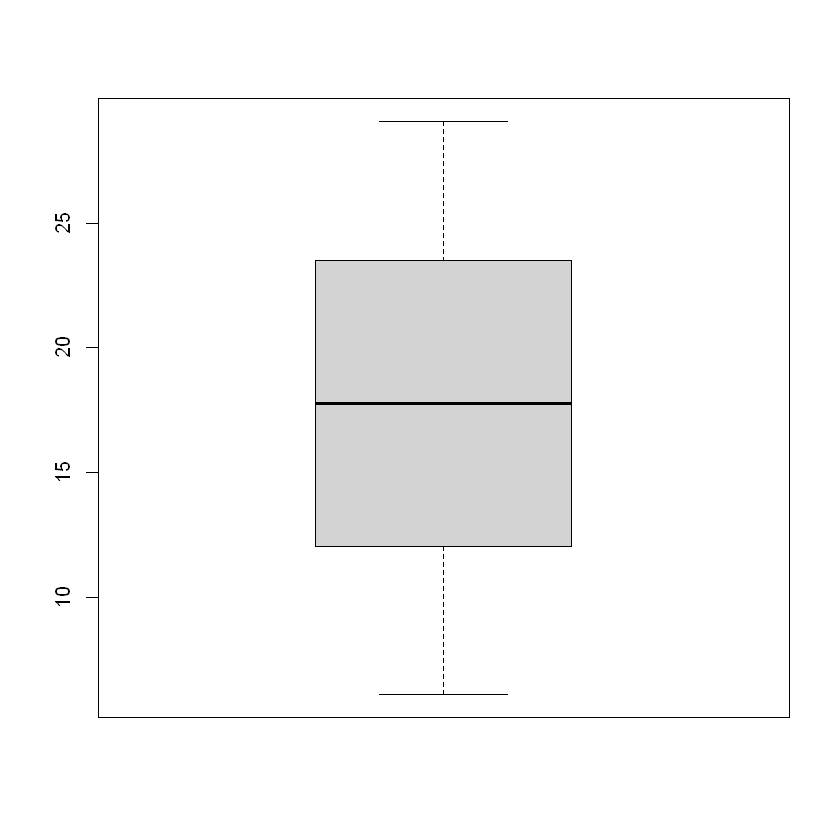

In [97]:
#on transforme la variable Dt_Customer en Date
data[,"Dt_Customer"] <- as.Date(data$Dt_Customer, format = "%d-%m-%Y")
#nombre de jours depuis le 01-01-2015
data$Customer_Since_Months <- as.numeric(difftime(as.Date("2015-01-01"), data$Dt_Customer,units = "days")) / 30.44
#catégories d'ancienneté
data$Customer_Dt_Category <- cut(data$Customer_Since_Months,
                             breaks = c(-Inf, 12, 24, Inf),
                          labels = c("Récent", "Moyen", "Ancien"))
boxplot(data$Customer_Since_Months)
summary(data)

## 2.4 Exploration et transformation des données quantitatives

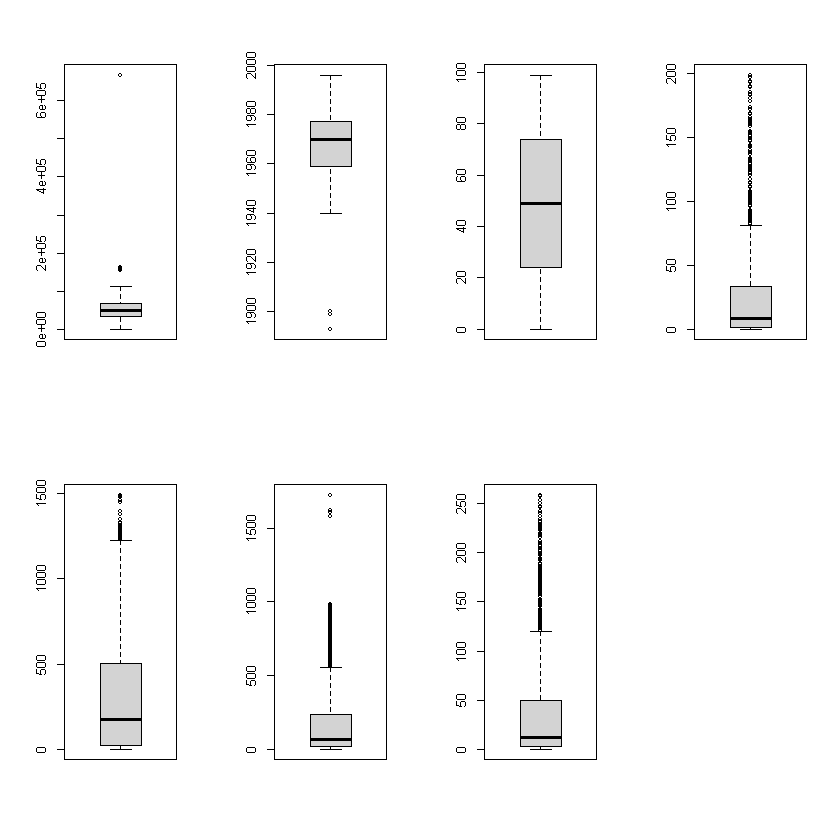

In [98]:
par(mfrow = c(2, 4))  
boxplot(data$Income)
boxplot(data$Year_Birth)
boxplot(data$Recency)
boxplot(data$MntFruits)
boxplot(data$MntWines)
boxplot(data$MntMeatProducts)
boxplot(data$MntFishProducts)

### Analyse des outliers :

On fait les boxplots de chaque variables quantitatives pour observer si il y a des valeurs abérrantes.
- ici on ne regarde pas la variable Dt_Customer que l'on transformera plus tard en numeric
- on remarque plusieurs outliers au niveau de plusieurs variables que l'on va devoir enlever :

Income : on voit un outlier 

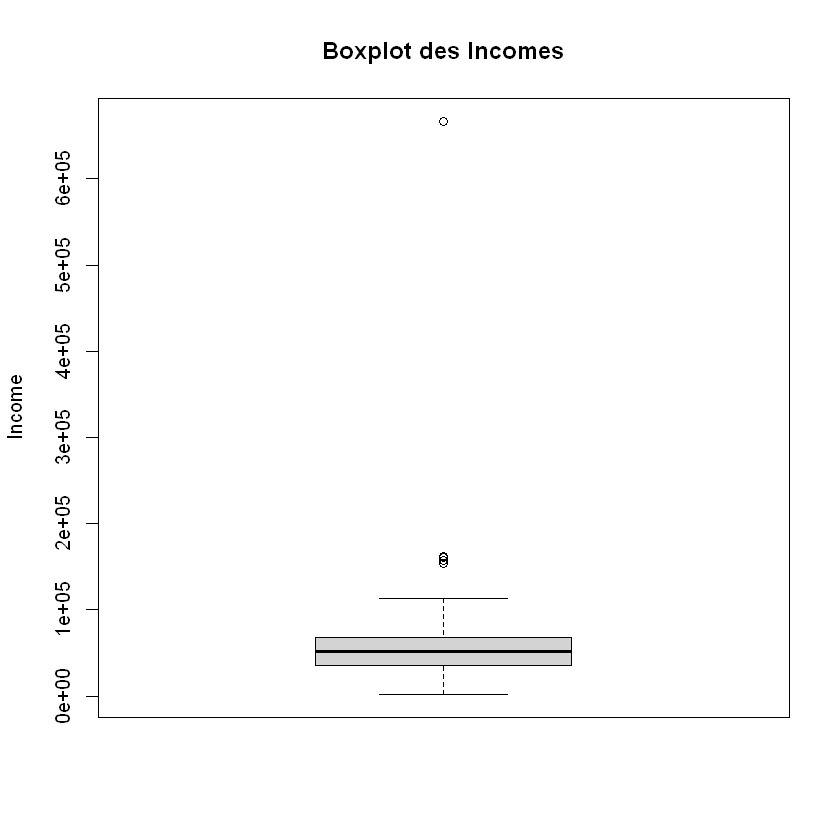

In [99]:
boxplot(data$Income, main = "Boxplot des Incomes", ylab = "Income")

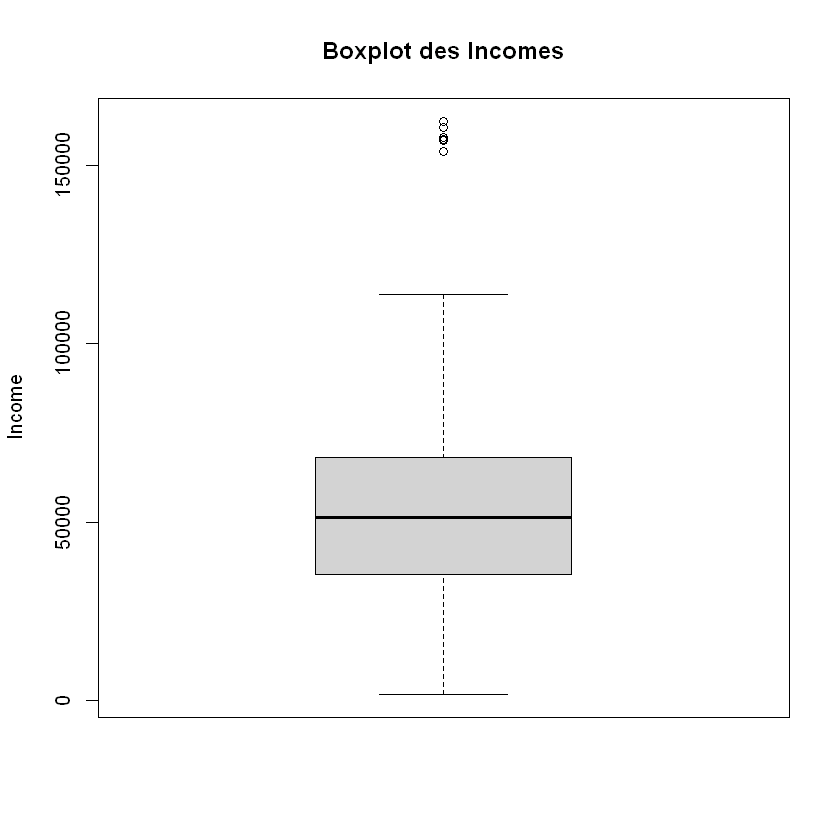

In [100]:
data_clean <- data[data$Income <= 500000, ]
#verification : 
boxplot(data_clean$Income, main = "Boxplot des Incomes", ylab = "Income")

Year_Birth : plusieurs outliers

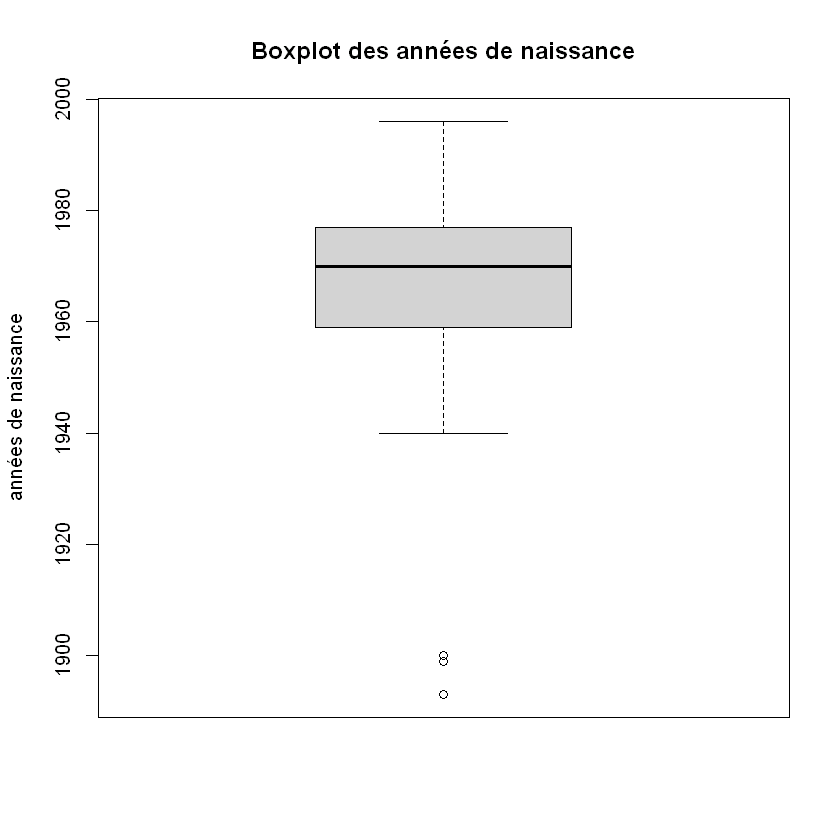

In [101]:
boxplot(data_clean$Year_Birth, main = "Boxplot des années de naissance", ylab = "années de naissance")

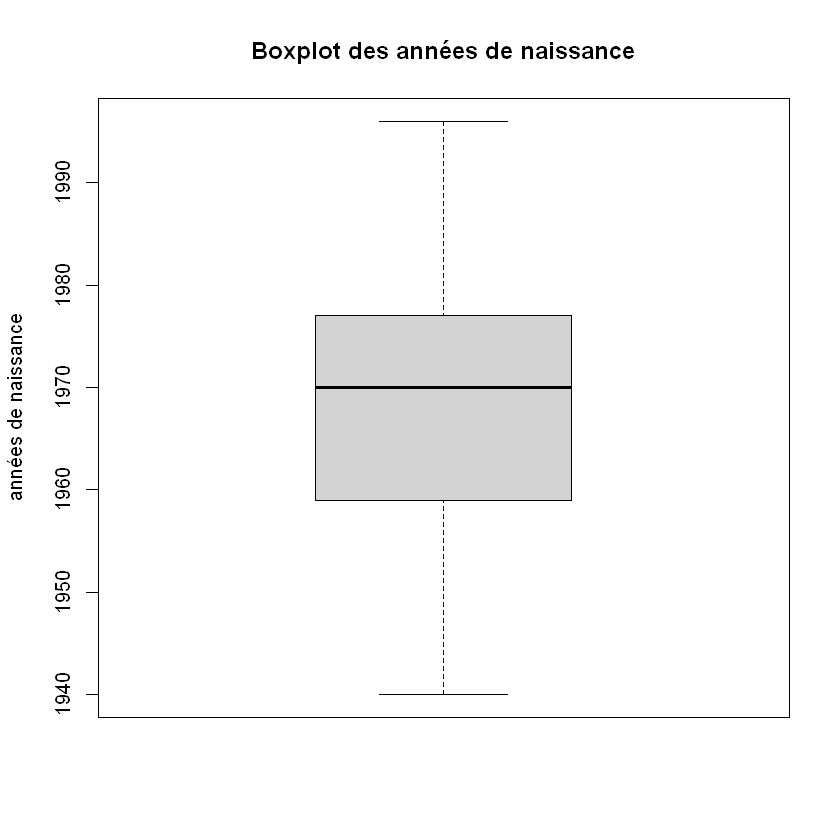

In [102]:
data_clean <- data_clean[data_clean$Year_Birth > 1920, ]
#verification :
boxplot(data_clean$Year_Birth, main = "Boxplot des années de naissance", ylab = "années de naissance")

MntMeatProducts : plusieurs outliers (ce ne sont pas forcément des données fausses mais l'objectif est de cibler des clients types, non des clients niches)

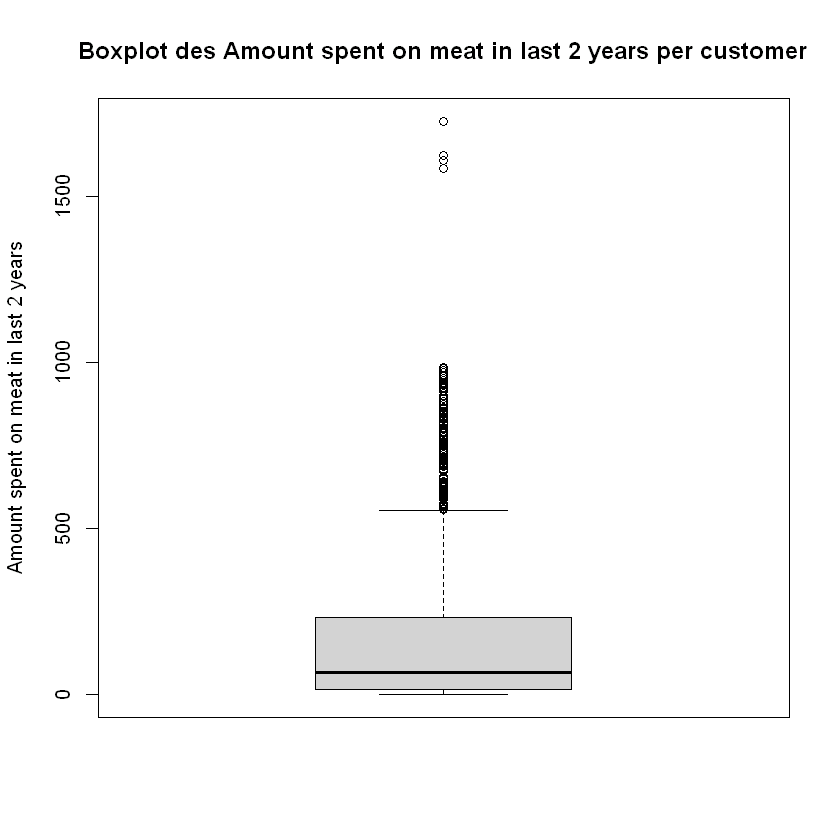

In [103]:
boxplot(data_clean$MntMeatProducts, main = "Boxplot des Amount spent on meat in last 2 years per customer", ylab = "Amount spent on meat in last 2 years")

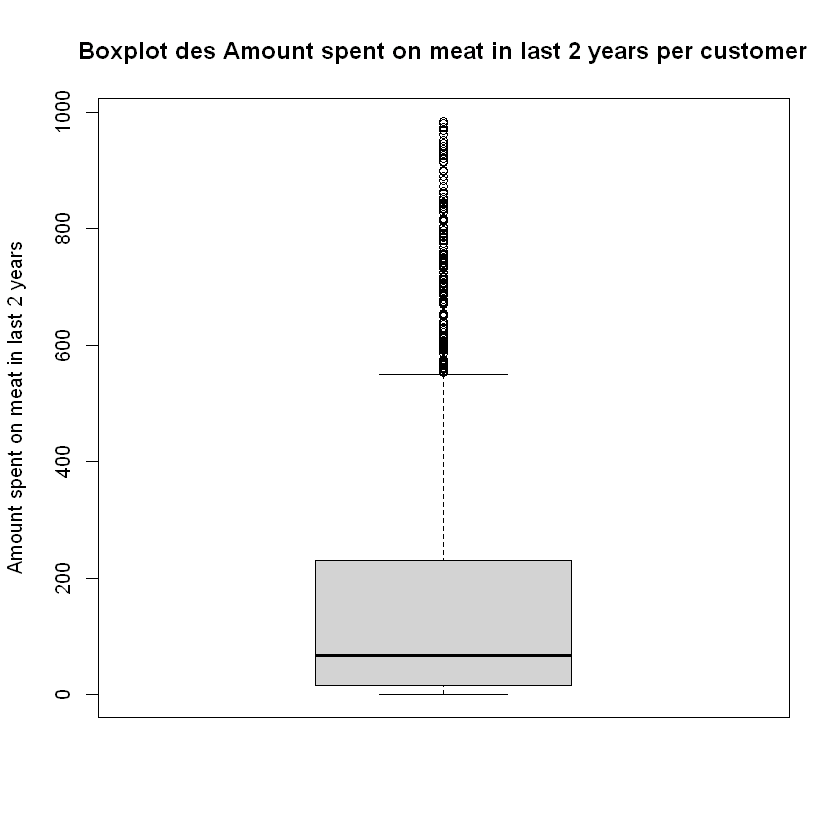

In [104]:
data_clean <- data_clean[data_clean$MntMeatProducts < 1500, ]
#verification :
boxplot(data_clean$MntMeatProducts, main = "Boxplot des Amount spent on meat in last 2 years per customer", ylab = "Amount spent on meat in last 2 years")

Nous venons d'enlever tout les outliers. 

Les données sont maintenant prêtes pour l'analyse.

## 2.5 Exploration et transformation des données qualitatives

#### Statut Marital

In [105]:
summary(data_clean$Marital_Status)

Absurd    Alone Divorced  Married   Single Together    Widow     YOLO 
       2        3      231      861      479      576       77        2

On décide de supprimer les catégories Absurd et YOLO. De plus, nous allons regrouper les catégories Alone, Single et Widow en Seul et Together, Married  en Couple.

In [106]:
data_clean$Marital_Status <- as.character(data_clean$Marital_Status)

data_clean <- filter(data_clean, Marital_Status != "Absurd")
data_clean <- filter(data_clean, Marital_Status != "YOLO")

data_clean$Marital_Status[data_clean$Marital_Status == "Alone"] <- "Seul"
data_clean$Marital_Status[data_clean$Marital_Status == "Widow"] <- "Seul"
data_clean$Marital_Status[data_clean$Marital_Status == "Single"] <- "Seul"
data_clean$Marital_Status[data_clean$Marital_Status == "Together"] <- "Couple"
data_clean$Marital_Status[data_clean$Marital_Status == "Married"] <- "Couple"
data_clean$Marital_Status[data_clean$Marital_Status == "Divorced"] <- "Divorcé"

data_clean[, "Marital_Status"] <- as.factor(data_clean[, "Marital_Status"])

summary(data_clean$Marital_Status)

Couple Divorcé    Seul 
   1437     231     559

#### Enfants

In [107]:
data_clean$Kidhome <- as.numeric(as.character(data_clean$Kidhome))
data_clean$Teenhome <- as.numeric(as.character(data_clean$Teenhome))

# Calculer le nombre total d'enfants
data_clean$Enfant <- data_clean$Kidhome + data_clean$Teenhome

# Convertir en facteur si tu veux travailler avec des catégories
data_clean$Enfant <- as.factor(data_clean$Enfant)

# Afficher un résumé de la colonne "Enfant"
summary(data_clean$Enfant)

data_clean <- subset(data_clean, select = -c(Kidhome, Teenhome))

0    1    2    3 
 632 1121  421   53

On vient de regrouper ces deux variables pour creer une seule variable Enfant, plus facile à analyser et à interpreter par la suite.

#### Education


In [108]:
summary(data_clean$Education)

2n Cycle      Basic Graduation     Master        PhD 
       200         54       1123        369        481

Afin de simplifier notre jeu de données et d'affiner l'analyse, nous allons regrouper les varaibles "Basic" et "Graduation" en une variable "Moyen". Nous allons aussi regrouper les Master et PhD en "Elevé". Enfin, nous transformons "2nd cycle" en "Faible".

In [109]:
data_clean$Education <- as.character(data_clean$Education)
data_clean$Education[data_clean$Education == "2n Cycle"] <- "Faible"
data_clean$Education[data_clean$Education == "Basic"] <- "Moyen"
data_clean$Education[data_clean$Education == "Graduation"] <- "Moyen"
data_clean$Education[data_clean$Education == "Master"] <- "Elevé"
data_clean$Education[data_clean$Education == "PhD"] <- "Elevé"
data_clean$Education <- as.factor(data_clean$Education)
summary(data_clean$Education)

Elevé Faible  Moyen 
   850    200   1177

#### Campagnes

Ici on va créer une nouvelle variable : le nombre de promotion acceptée.

In [110]:
data_clean$AcceptedCmp1 <- as.numeric(as.character(data_clean$AcceptedCmp1))
data_clean$AcceptedCmp2 <- as.numeric(as.character(data_clean$AcceptedCmp2))
data_clean$AcceptedCmp3 <- as.numeric(as.character(data_clean$AcceptedCmp3))
data_clean$AcceptedCmp4 <- as.numeric(as.character(data_clean$AcceptedCmp4))
data_clean$AcceptedCmp5 <- as.numeric(as.character(data_clean$AcceptedCmp5))
data_clean$Response <- as.numeric(as.character(data_clean$Response))

data_clean$Total_Cmp <- data_clean$AcceptedCmp1+ data_clean$AcceptedCmp2 + data_clean$AcceptedCmp3+ data_clean$AcceptedCmp4 +data_clean$AcceptedCmp5+data_clean$Response

data_clean[, "AcceptedCmp2"] <- as.factor(data_clean[, "AcceptedCmp2"])
data_clean[, "AcceptedCmp1"] <- as.factor(data_clean[, "AcceptedCmp1"])
data_clean[, "AcceptedCmp3"] <- as.factor(data_clean[, "AcceptedCmp3"])
data_clean[, "AcceptedCmp4"] <- as.factor(data_clean[, "AcceptedCmp4"])
data_clean[, "AcceptedCmp5"] <- as.factor(data_clean[, "AcceptedCmp5"])
data_clean[, "Response"] <- as.factor(data_clean[, "Response"])
data_clean[, "Total_Cmp"] <- as.factor(data_clean[, "Total_Cmp"])
summary(data_clean$Total_Cmp)




0    1    2    3    4    5 
1622  367  142   50   36   10

Cette variable Total_Cmp nous permet de savoir si une personne est influencée par les promotions.

## 2.6 Création de nouvelles variables 

#### Argent dépensé

On créé une nouvelle variable qui prend le total des dépenses pour chaque catégories (Viandes, Fruits etc) 

In [111]:
data_clean$Total_Depense <- data_clean$MntWines+ data_clean$MntFruits + data_clean$MntMeatProducts + data_clean$MntFishProducts +data_clean$MntSweetProducts +data_clean$MntGoldProds
summary(data_clean$Total_Depense)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    5.0    68.5   395.0   603.2  1039.5  2525.0 

#### Achat

In [112]:
data_clean$Total_Achat <- data_clean$NumWebPurchases+ data_clean$NumCatalogPurchases + data_clean$NumStorePurchases 
summary(data_clean$Total_Achat)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    6.00   12.00   12.52   18.00   32.00 

Ici, le minimum est à 0 ce qui signifie que certains clients n'ont rien acheté. Cela ne contredit pas ce que nous avions analysé précedemment sur la variable Total_Depense, qui ne prend en compte que les dépenses sur certaines catégories.  

#### Age

Nous allons maintenant réaliser des catégories d'age à partir de l'année de naissance

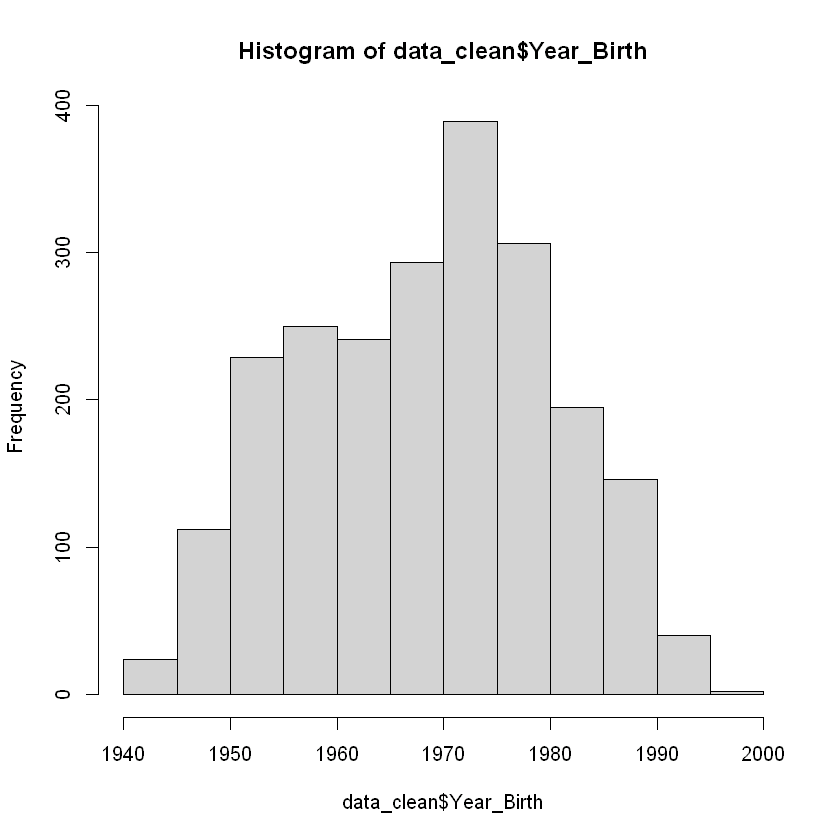

In [113]:
hist(data_clean$Year_Birth)

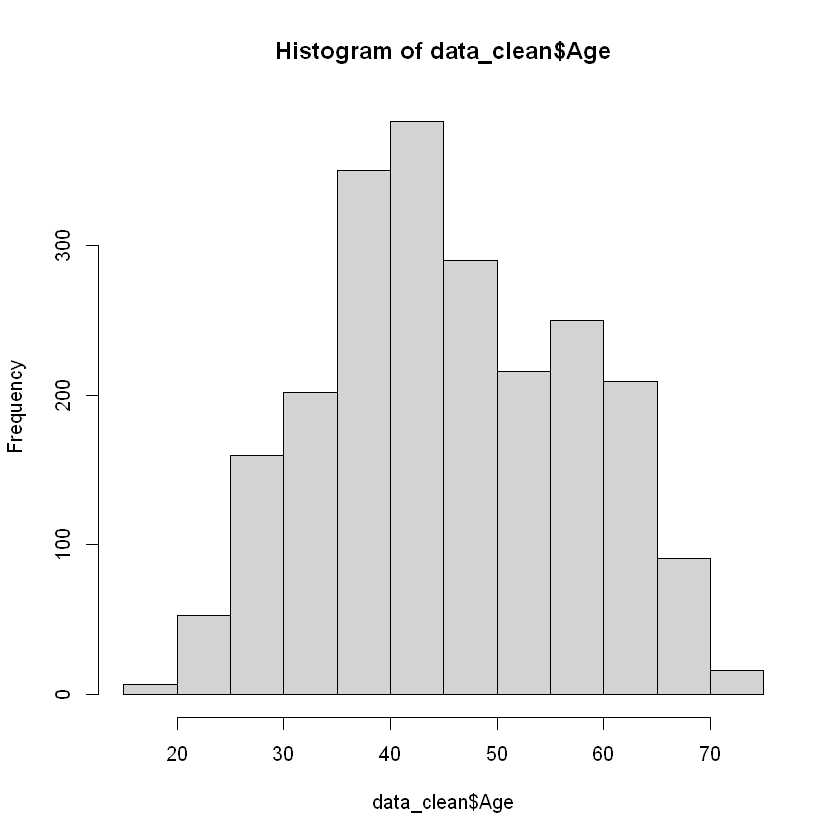

In [114]:
# Charger les bibliothèques nécessaires
library(dplyr)
library(tidyr)

# Définir l'année de référence
annee_actuelle<- 2015

# Calcul de l'âge
data_clean$Age <- annee_actuelle- data_clean$Year_Birth
hist(data_clean$Age)
data_clean <- subset(data_clean, select = -Year_Birth)

In [115]:
# Charger dplyr pour la manipulation des données
library(dplyr)

# Définition des catégories d'âge
bins <- c(0, 30, 45, 60, 84)  # Intervalles d'âge
labels <- c("0-30", "30-45", "45-60", "60+")  # Noms des catégories

# Catégorisation des âges en groupes (convertis en facteur)
data_clean <- data_clean %>%
  mutate(Age_Categorie = cut(Age, breaks = bins, labels = labels, right = TRUE, include.lowest = TRUE))

# Afficher un aperçu des données
print(head(data_clean))

    ID Education Marital_Status Income Dt_Customer Recency MntWines MntFruits
1 5524     Moyen           Seul  58138  2012-09-04      58      635        88
2 2174     Moyen           Seul  46344  2014-03-08      38       11         1
3 4141     Moyen         Couple  71613  2013-08-21      26      426        49
4 6182     Moyen         Couple  26646  2014-02-10      26       11         4
5 5324     Elevé         Couple  58293  2014-01-19      94      173        43
6 7446     Elevé         Couple  62513  2013-09-09      16      520        42
  MntMeatProducts MntFishProducts MntSweetProducts MntGoldProds
1             546             172               88           88
2               6               2                1            6
3             127             111               21           42
4              20              10                3            5
5             118              46               27           15
6              98               0               42           14
  NumD

## Conclusion du nettoyage des donéees :

In [28]:
data_clean <- subset(data_clean)
summary(data_clean)

       ID         Education    Marital_Status     Income      
 Min.   :    0   Elevé : 850   Couple :1437   Min.   :  1730  
 1st Qu.: 2828   Faible: 200   Divorcé: 231   1st Qu.: 35429  
 Median : 5455   Moyen :1177   Seul   : 559   Median : 51382  
 Mean   : 5588                                Mean   : 51817  
 3rd Qu.: 8419                                3rd Qu.: 68145  
 Max.   :11191                                Max.   :162397  
  Dt_Customer            Recency         MntWines        MntFruits     
 Min.   :2012-07-30   Min.   : 0.00   Min.   :   0.0   Min.   :  0.00  
 1st Qu.:2013-01-17   1st Qu.:24.00   1st Qu.:  24.0   1st Qu.:  1.00  
 Median :2013-07-09   Median :50.00   Median : 174.0   Median :  8.00  
 Mean   :2013-07-10   Mean   :49.16   Mean   : 304.7   Mean   : 26.29  
 3rd Qu.:2013-12-30   3rd Qu.:74.00   3rd Qu.: 505.0   3rd Qu.: 33.00  
 Max.   :2014-06-29   Max.   :99.00   Max.   :1493.0   Max.   :199.00  
 MntMeatProducts MntFishProducts  MntSweetProducts  Mnt

# III Analyse exploratoire bidimensionnelle :

L'objectif est de faire une première analyse sur toutes les variables quantitatives et qualitatives.

## 3.1 Comparaison des variables quantitatives/quantitatives

In [29]:
library (GGally)
library (vcd)

Le chargement a nécessité le package : grid



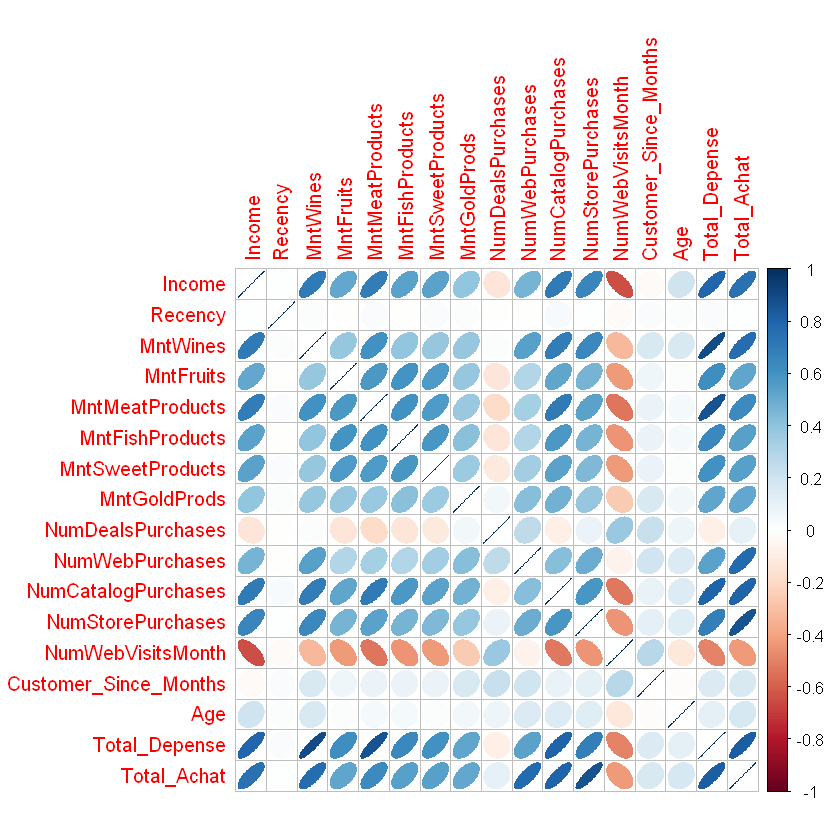

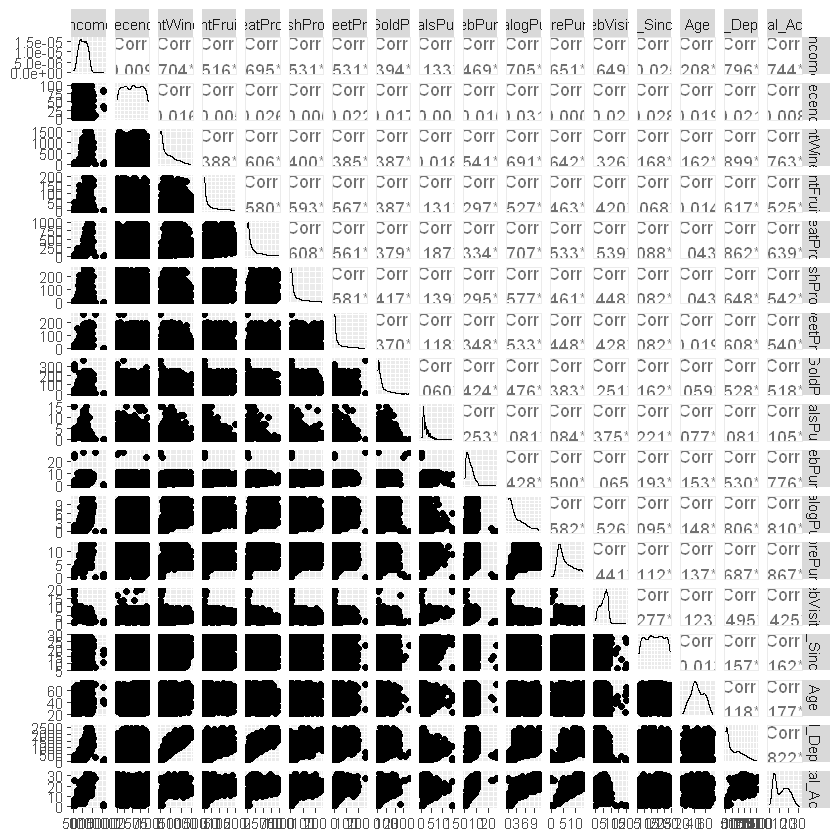

In [30]:
col_quanti<-data_clean[, sapply(data_clean, is.numeric) & colnames(data_clean) != "ID"]
corrplot(cor(col_quanti), method = "ellipse")
ggpairs(col_quanti)


Nous constatons que le revenu et le total des dépenses sont fortement corrélé aux dépenses en viandes et en vin. Cette affirmation est cohérente avec notre intiution. Les personnes ayant un salaire plus élévé achètent plus de viande et de vin (produits onéreux). De manière générale, ces personnes dépensent plus.

## 3.2 Comparaison des variables qualitatives/qualitatives

Observons la dépendance entre 2 variables qualitatives à l'aide de l'outil "mosaic plot". Nous cherchons un lien entre les caractéristiques d'une personne (Age, enfants éducation..) et sa réponse aux campagnes marketing.

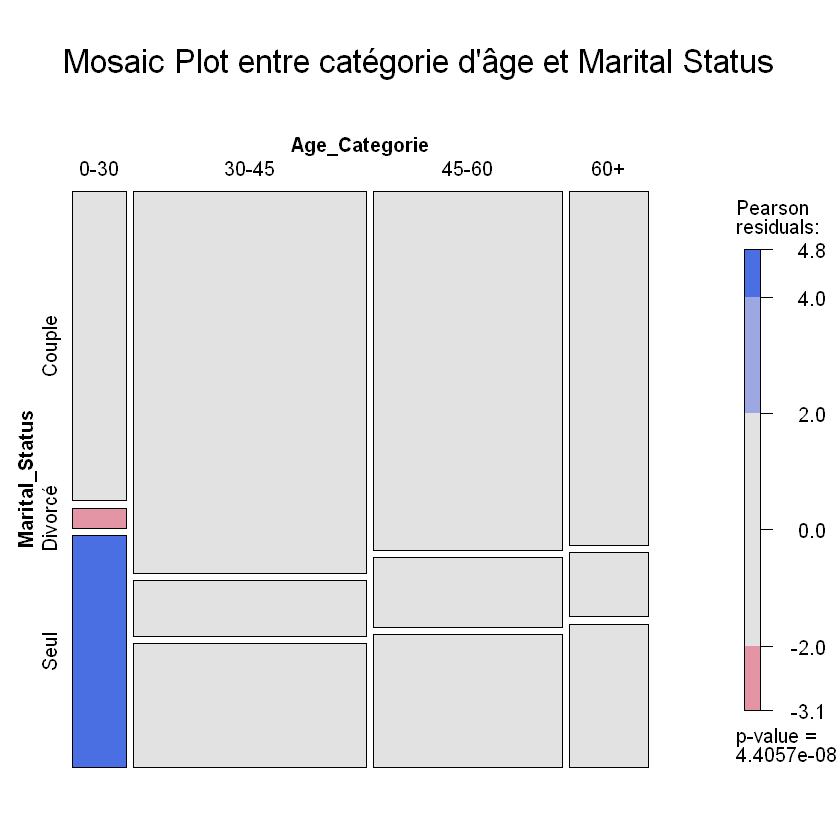

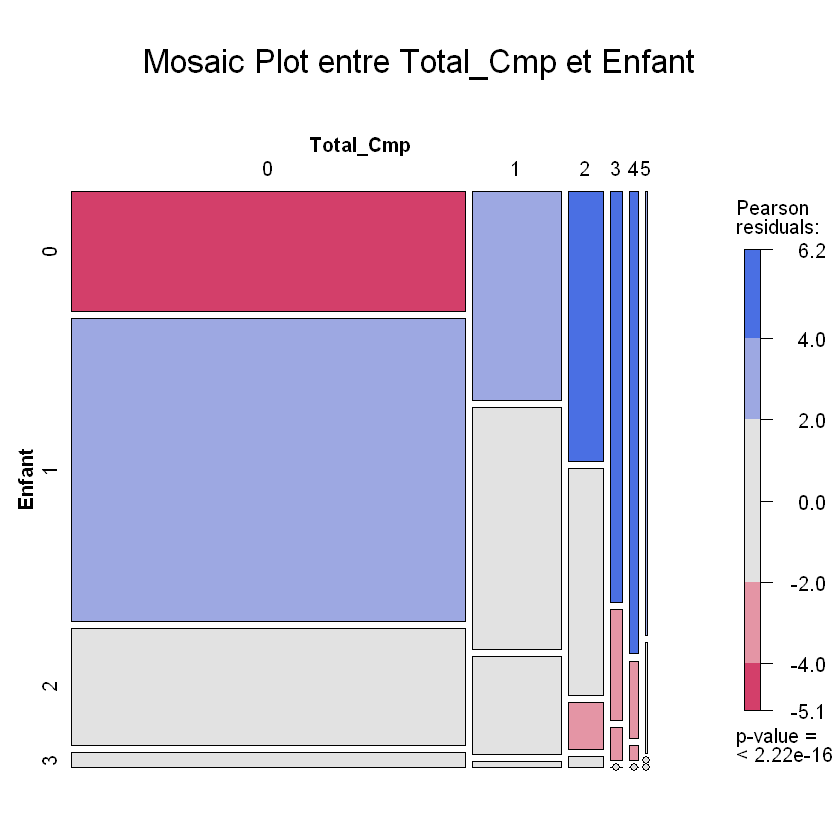

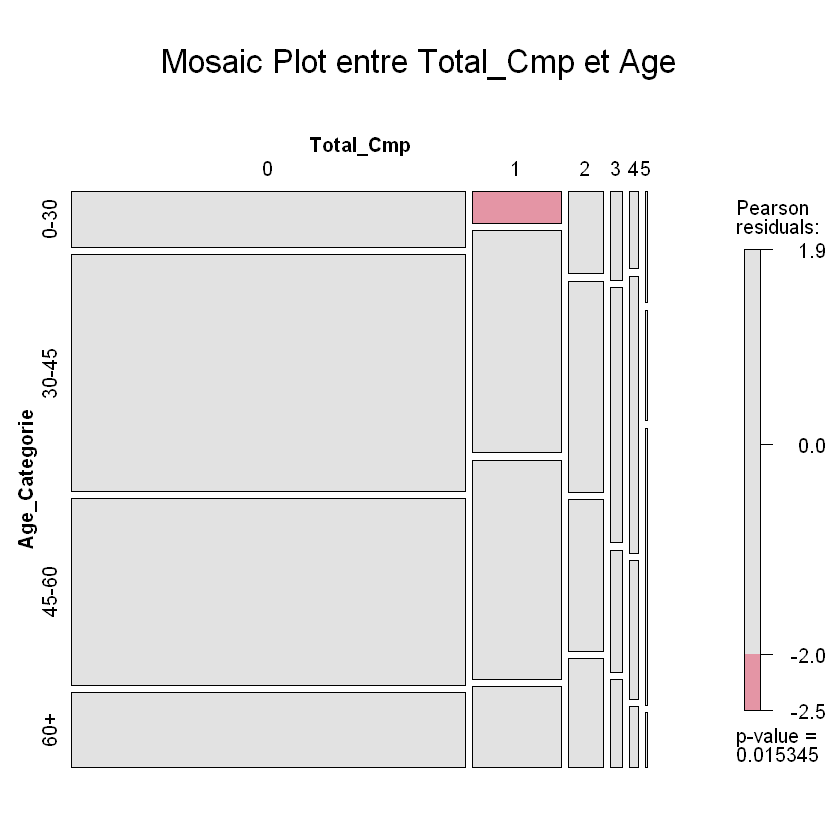

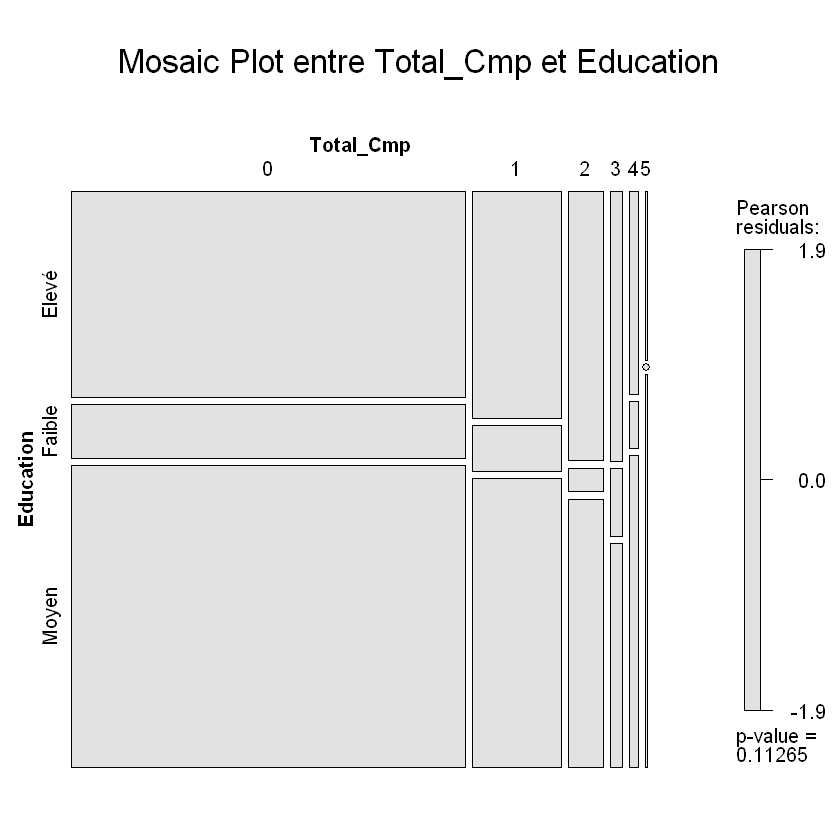

In [31]:
mosaic( xtabs(~ Age_Categorie +  Marital_Status, data=data_clean),  shade = TRUE, 
            split_vertical = TRUE,
            main="Mosaic Plot entre catégorie d'âge et Marital Status")

mosaic( xtabs(~ Total_Cmp +  Enfant, data=data_clean),  shade = TRUE, 
            split_vertical = TRUE,
            main="Mosaic Plot entre Total_Cmp et Enfant")

mosaic( xtabs(~ Total_Cmp +  Age_Categorie, data=data_clean),  shade = TRUE, 
            split_vertical = TRUE,
            main="Mosaic Plot entre Total_Cmp et Age")

mosaic( xtabs(~ Total_Cmp +  Education, data=data_clean),  shade = TRUE, 
            split_vertical = TRUE,
            main="Mosaic Plot entre Total_Cmp et Education")


On remarque que le niveau d'éducation est indépendant du nombre d'enfants, alors que la catégorie d'âge ne l'est pas. De plus, il y a une relation significative entre catégorie d'âge et statut marital, les moins de 30 ans sont plus souvents seuls.

## 3.3 Comparaison des variables quantitatives/qualitatives

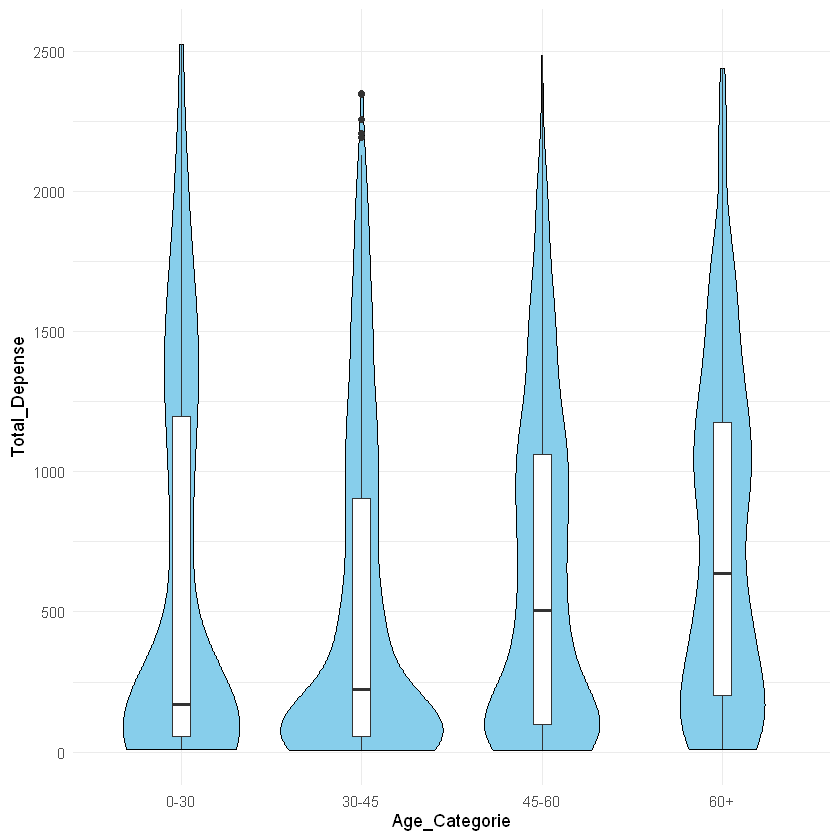

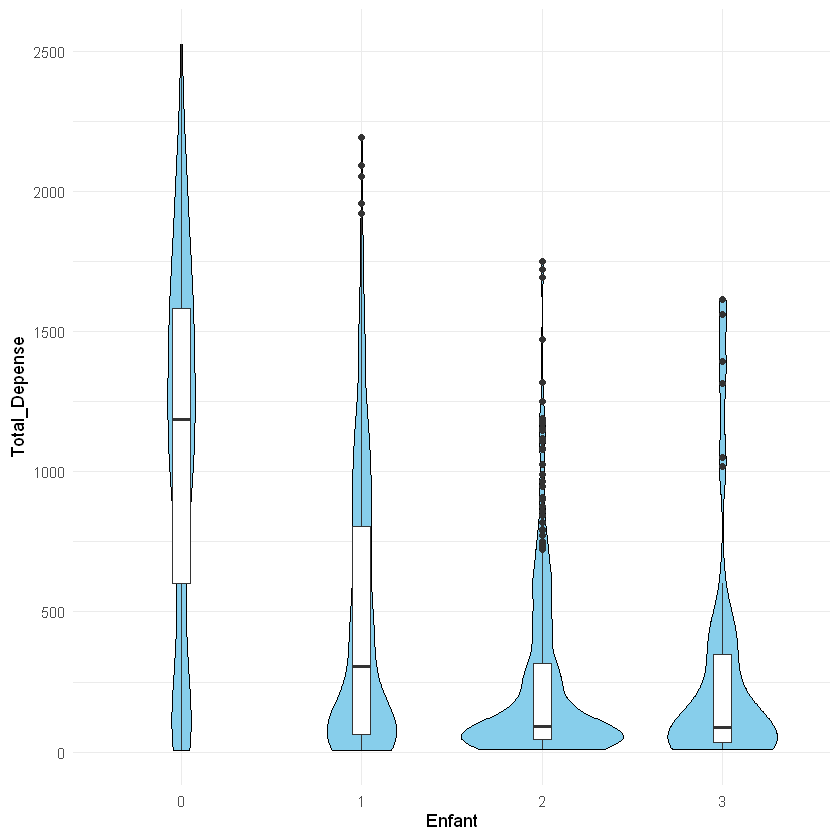

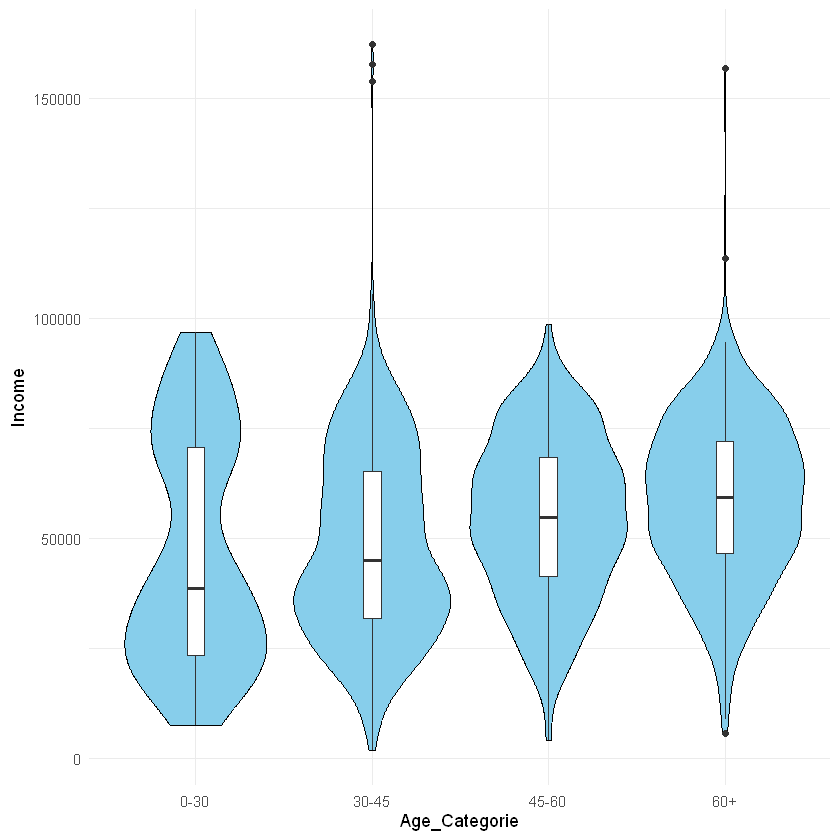

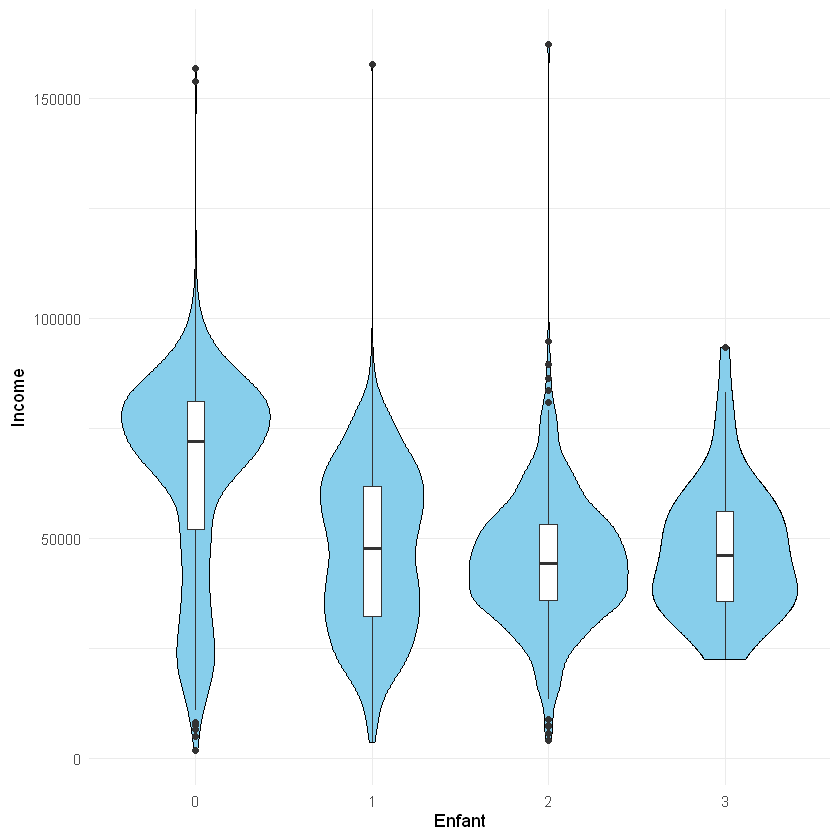

In [32]:
ggplot(data_clean, aes(x = Age_Categorie, y = Total_Depense)) +
  geom_violin(fill = "skyblue", color = "black") +
  theme_minimal()+ geom_boxplot(width = 0.1, fill = "white")

ggplot(data_clean, aes(x = Enfant, y = Total_Depense)) +
  geom_violin(fill = "skyblue", color = "black") +
  theme_minimal()+ geom_boxplot(width = 0.1, fill = "white") 

ggplot(data_clean, aes(x = Age_Categorie, y = Income)) +
  geom_violin(fill = "skyblue", color = "black") +
  theme_minimal()+ geom_boxplot(width = 0.1, fill = "white") 

ggplot(data_clean, aes(x = Enfant, y = Income)) +
  geom_violin(fill = "skyblue", color = "black") +
  theme_minimal()+ geom_boxplot(width = 0.1, fill = "white") 

Le salaire et les dépenses augmentent avec l'âge. Pour autant, ils baissent avec le nombre d'enfants. Une explication plausible est celle que les personnes sans enfants travaillent plus et ainsi gagnent plus d'argent. On peut aussi voir que plus on est agés, plus on a de chances que nos enfants aient quittés la maison.

# IV Analyse multivariée :

## 4.1 Analyse en composantes principales et clustering sur l'ensemble des données

In [56]:
library(reshape2)
library(gridExtra)

On ne garde que les variables quantitatives.

In [57]:
data_quanti <- data_clean[, c("Income", "Recency", "MntWines", "MntFruits", "MntMeatProducts",
                                 "MntFishProducts", "MntSweetProducts", "MntGoldProds",
                                 "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
                                 "NumStorePurchases", "NumWebVisitsMonth", "Total_Depense",
                                 "Total_Achat", "Total_Cmp", "Age", "Customer_Since_Months")]


On effectue une ACP sur les données quantitatives.

In [61]:
data_quanti$Total_Cmp <- as.numeric(as.character(data_quanti$Total_Cmp)) #Total_Cmp était en facteur je la transforme en variable quantitative

res_pca <- PCA(data_quanti, scale.unit = TRUE, ncp = 5, graph = FALSE)

# Extraction des composantes principales (scores des individus)
marketing_pca <- res_pca$ind$coord


On peut afficher la part de variance de chaque axe.

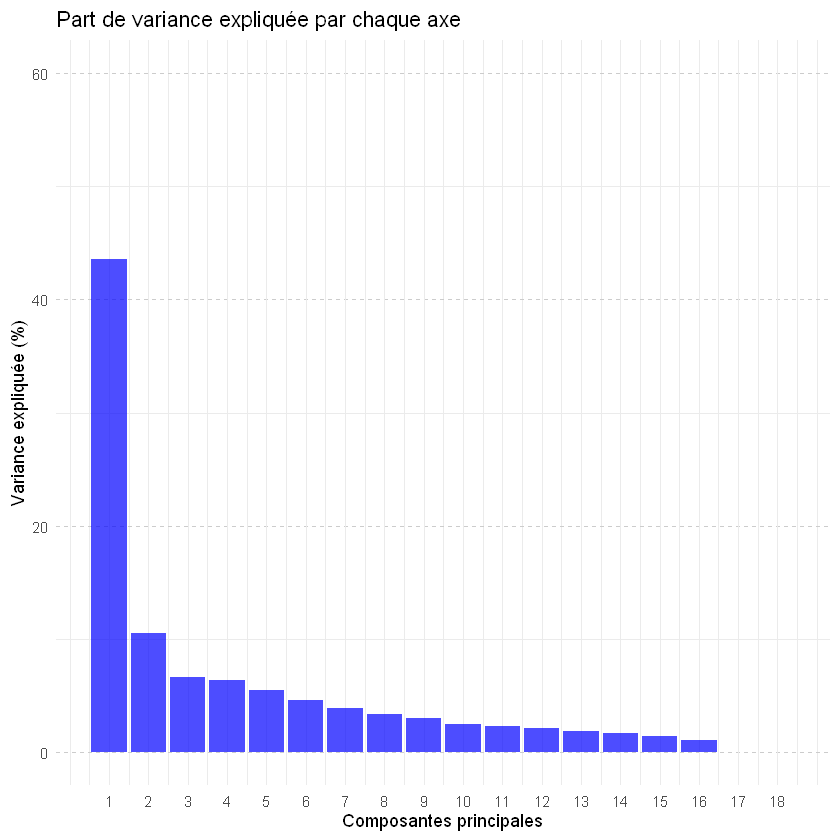

In [62]:
library(ggplot2)

explained_var <- res_pca$eig[, 2]  
n_components <- length(explained_var)
df_var <- data.frame(
  PC = 1:n_components,
  Variance = explained_var
)
ggplot(df_var, aes(x = PC, y = Variance)) +
  geom_bar(stat = "identity", fill = "blue", alpha = 0.7) +
  labs(title = "Part de variance expliquée par chaque axe",
       x = "Composantes principales",
       y = "Variance expliquée (%)") +
  scale_x_continuous(breaks = 1:n_components) +
  ylim(0, 60) +
  theme_minimal() +
  theme(panel.grid.major.y = element_line(linetype = "dashed", color = "gray80"))


On voit que les deux premiers axes contiennent à peu près 54% de la variance. Vu que les trois axes suivants forment un "plateau", pour cette première analyse nous ne retiendrons que les deux premiers axes. On peut aussi afficher le cercle des corrélations pour visualiser la contribution et la corrélation de chaque variable aux deux premières dimensions de notre ACP.

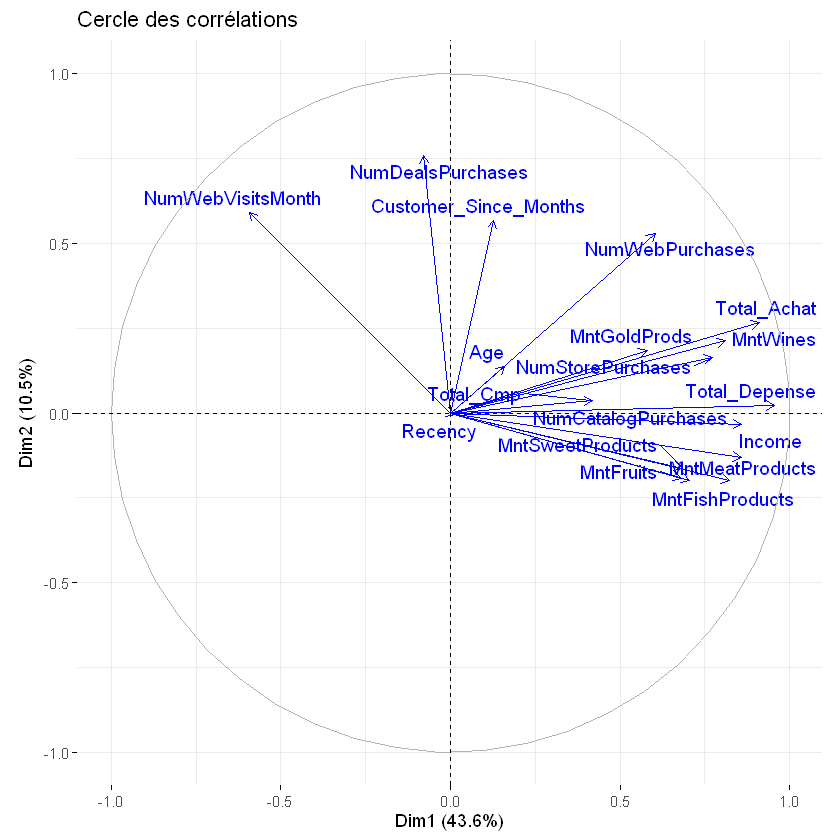

In [63]:
library(factoextra)
fviz_pca_var(res_pca,
             col.var = "blue",        
             repel = TRUE,            
             axes = c(1, 2),          
             title = "Cercle des corrélations")


On remarque que la dimension 1 est fortement expliquée par des variables relatives aux dépenses et au salaire. La deuxième quant à elle est surtout reliée aux nombre d'achats faits en promotion, et à l'ancienneté. Pour y voir plus clair et commencer à distinguer des tendances, on peut afficher la projection des individus sur l'espace de notre ACP, en faisant un habillage avec une variable qualitative, par exemple le nombre d'enfants.

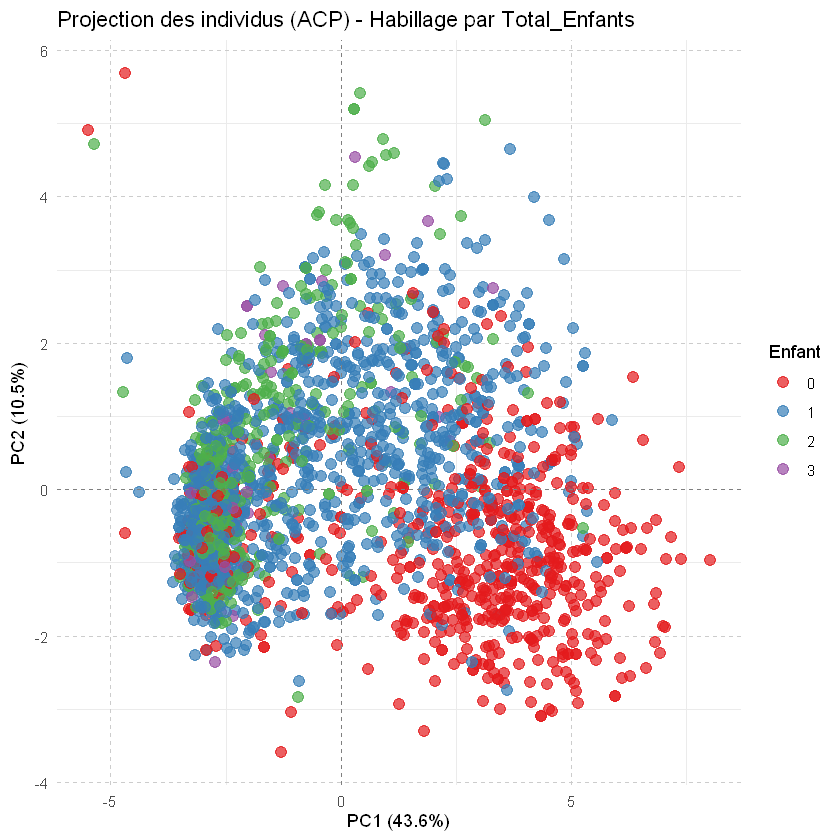

In [68]:
library(ggplot2)
library(dplyr)

pca_df <- as.data.frame(res_pca$ind$coord[, 1:2])
colnames(pca_df) <- c("PC1", "PC2")
pca_df$Enfant <- data_clean$Enfant
var_expl <- res_pca$eig[1:2, 2]

ggplot(pca_df, aes(x = PC1, y = PC2, color = as.factor(Enfant))) +
  geom_point(size = 3, alpha = 0.7) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50", linewidth = 0.5) +
  geom_vline(xintercept = 0, linetype = "dashed", color = "gray50", linewidth = 0.5) +
  scale_color_brewer(palette = "Set1") +  
  labs(title = "Projection des individus (ACP) - Habillage par Total_Enfants",
       x = paste0("PC1 (", round(var_expl[1], 1), "%)"),
       y = paste0("PC2 (", round(var_expl[2], 1), "%)"),
       color = "Enfant") +
  theme_minimal() +
  theme(panel.grid.major = element_line(linetype = "dashed", color = "gray80"))


Un groupe se détache : ceux des individus sans enfants. On peut voir qu'ils sont à droite de l'axe 1, donc cela correspond à des revenus et des dépenses plus élevées. Pour le reste, c'est moins précis.

On va essayer de former des clusters pour y voir plus clair. Commençons par un GMM (Gaussian Mixture Model). Cela suppose que les données sont distribuées selon plusieurs gaussiennes.

In [71]:
library(mclust)

gmm_model <- Mclust(res_pca$ind$coord[, 1:2], G = 3)  
clusters <- gmm_model$classification

# Ajouter les clusters au dataframe data_clean
data_clean$Cluster_GMM <- as.factor(clusters)


On se représente les indivdus dans l'espace de l'ACP avec leur cluster issu du GMM.

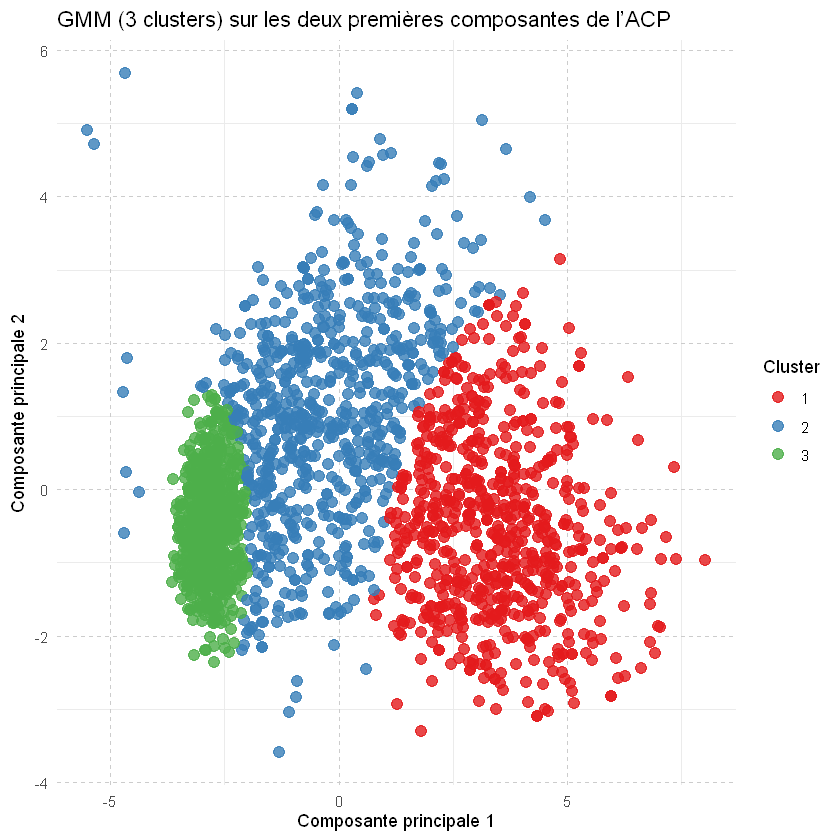

In [72]:
df_pca <- as.data.frame(res_pca$ind$coord[, 1:2])
colnames(df_pca) <- c("PC1", "PC2")
df_pca$cluster <- as.factor(data_clean$Cluster_GMM)

ggplot(df_pca, aes(x = PC1, y = PC2, color = cluster)) +
  geom_point(size = 3, alpha = 0.8) +
  scale_color_brewer(palette = "Set1") +
  labs(title = "GMM (3 clusters) sur les deux premières composantes de l’ACP",
       x = "Composante principale 1",
       y = "Composante principale 2",
       color = "Cluster") +
  theme_minimal() +
  theme(panel.grid.major = element_line(linetype = "dashed", color = "gray80"))


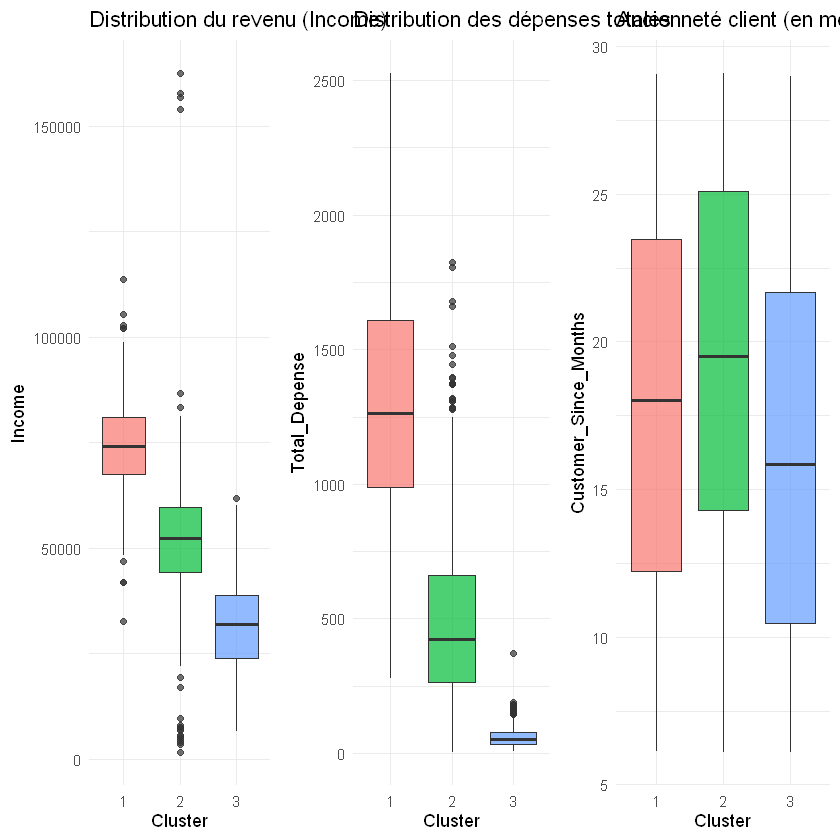

In [81]:
library(gridExtra)

# Income
p1 <- ggplot(data_clean, aes(x = Cluster_GMM, y = Income, fill = Cluster_GMM)) +
  geom_boxplot(alpha = 0.7) +
  labs(title = "Distribution du revenu (Income)", x = "Cluster", y = "Income") +
  theme_minimal() +
  theme(legend.position = "none")

# Total_Depense
p2 <- ggplot(data_clean, aes(x = Cluster_GMM, y = Total_Depense, fill = Cluster_GMM)) +
  geom_boxplot(alpha = 0.7) +
  labs(title = "Distribution des dépenses totales", x = "Cluster", y = "Total_Depense") +
  theme_minimal() +
  theme(legend.position = "none")

# Customer_Since_Months
p3 <- ggplot(data_clean, aes(x = Cluster_GMM, y = Customer_Since_Months, fill = Cluster_GMM)) +
  geom_boxplot(alpha = 0.7) +
  labs(title = "Ancienneté client (en mois)", x = "Cluster", y = "Customer_Since_Months") +
  theme_minimal() +
  theme(legend.position = "none")

grid.arrange(p1, p2, p3, ncol = 3)

On remarque le cluster 1 est celui qui contient les revenus et les dépenses les plus élevées, tandis que le cluster 3 contient des clients plus récents qui gagnent et dépensent moins. On observe maintant la répartition des variables quantitatives dans chaque cluster.

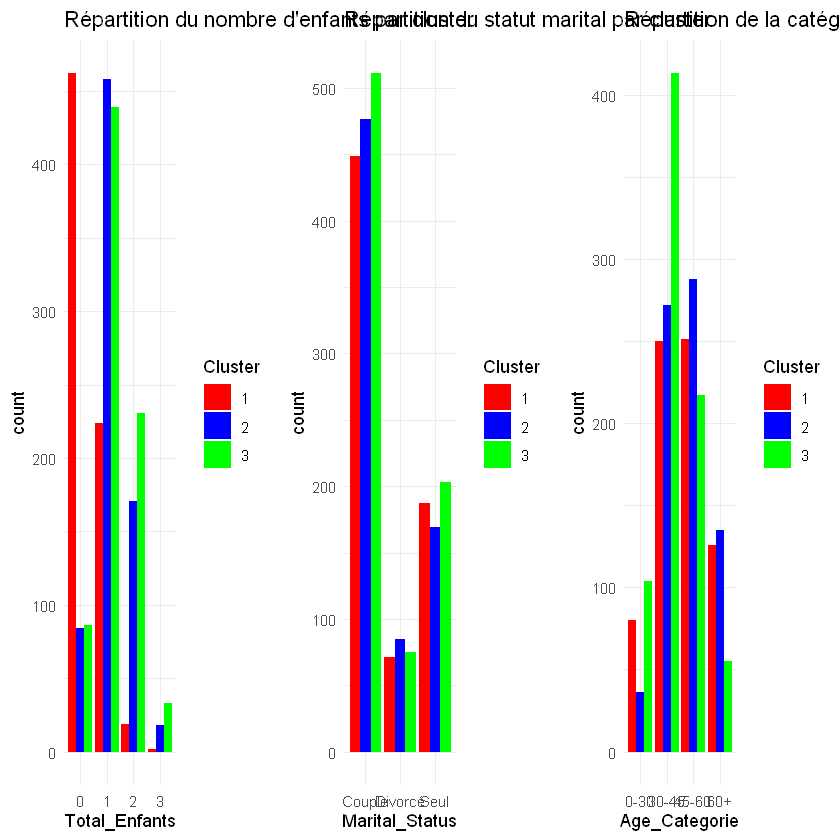

In [84]:
library(ggplot2)
library(gridExtra)

# Palette manuelle pour clusters 1, 2, 3
cluster_colors <- c("1" = "red", "2" = "blue", "3" = "green")

# Plot 1 : Total_Enfants
p1 <- ggplot(data_clean, aes(x = as.factor(Enfant), fill = Cluster_GMM)) +
  geom_bar(position = "dodge") +
  scale_fill_manual(values = cluster_colors) +
  labs(title = "Répartition du nombre d'enfants par cluster", x = "Total_Enfants", fill = "Cluster") +
  theme_minimal()

# Plot 2 : Marital_Status
p2 <- ggplot(data_clean, aes(x = Marital_Status, fill = Cluster_GMM)) +
  geom_bar(position = "dodge") +
  scale_fill_manual(values = cluster_colors) +
  labs(title = "Répartition du statut marital par cluster", x = "Marital_Status", fill = "Cluster") +
  theme_minimal()

# Plot 3 : Age_Categorie
p3 <- ggplot(data_clean, aes(x = Age_Categorie, fill = Cluster_GMM)) +
  geom_bar(position = "dodge") +
  scale_fill_manual(values = cluster_colors) +
  labs(title = "Répartition de la catégorie d'âge par cluster", x = "Age_Categorie", fill = "Cluster") +
  theme_minimal()

# Affichage côte à côte
grid.arrange(p1, p2, p3, ncol = 3)



On voit que le cluster 1 a moins d'enfants, et est plus âgé. Le cluster 3 quant à lui est plus jeune et a plus d'enfants. Le statut marital est équilibré entre chaque cluster.

Ainsi, cette première ACP et ce premier clustering commencent à confirmer les tendances aperçues lors des analyses uni et bi dimensionnelles, mais ils manquent d'interprétabilité, notamment dû au fait du grand nombre de variables présentes. On va donc se concentrer sur un nombre restreint de variables pour affiner notre étude.

## 4.2 Profil des personnes achetant du vin (ACP)

On sélectionne quatre variables pour notre analyse sur les dépenses en vin.

In [38]:
X <- data_clean[, c("Income", "Age", "Customer_Since_Months", "Total_Depense")]

On effectue une nouvelle ACP.

In [39]:
res_pca <- PCA(X, scale.unit = TRUE, ncp = 5, graph = FALSE)

On trace le graphique des variances cumulées, avec un trait à 80 % de variance expliquée

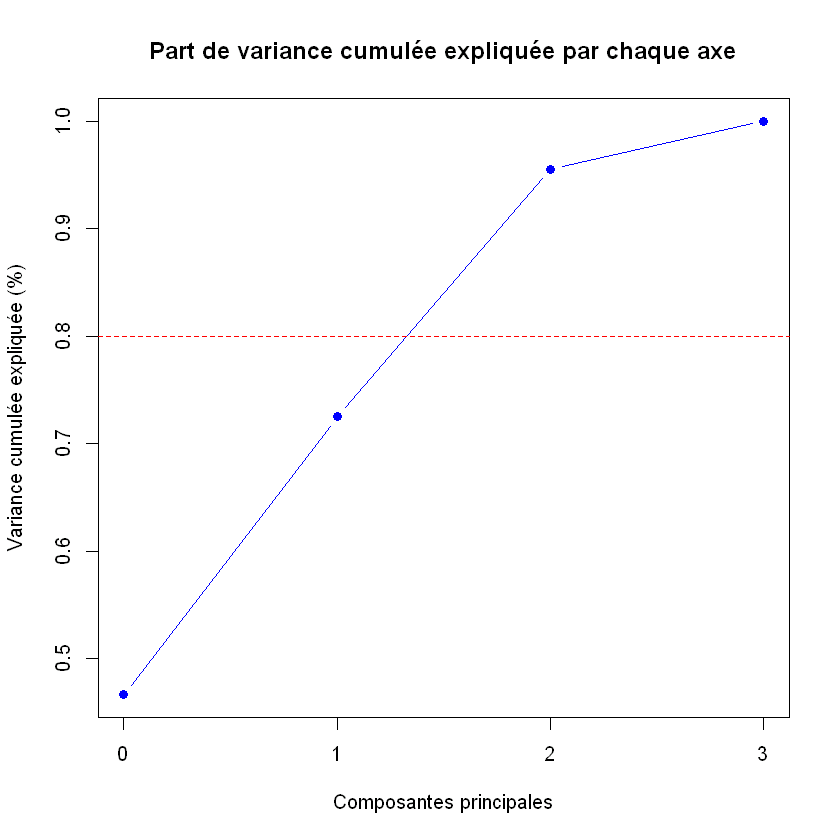

In [40]:
var_explained <- cumsum(res_pca$eig[1:4, 2]) / 100  
composantes <- 0:3
plot(composantes, var_explained,
     type = "b", col = "blue", pch = 16,
     xlab = "Composantes principales", ylab = "Variance cumulée expliquée (%)",
     main = "Part de variance cumulée expliquée par chaque axe",
     xaxt = "n")
axis(1, at = composantes)
abline(h = 0.8, col = "red", lty = 2)


On décide de garder deux dimensions. On se représente aussi le cercle des corrélations.

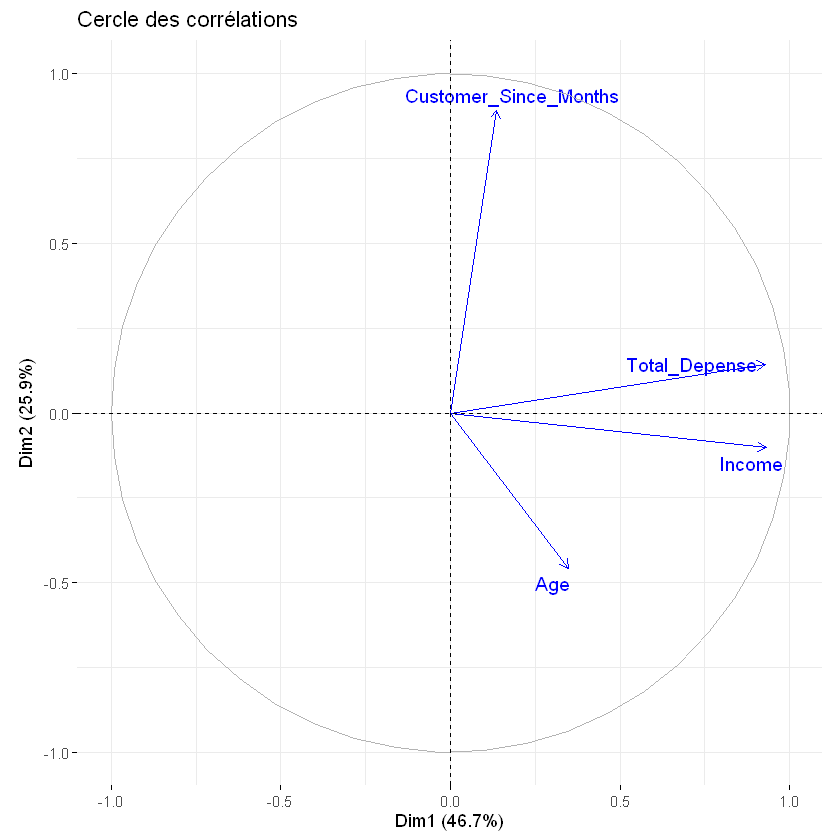

In [41]:
fviz_pca_var(res_pca,
             axes = c(1, 2),
             col.var = "blue", 
             repel = TRUE,       
             title = "Cercle des corrélations")

L'axe principal 1 est fortement engendré par Total_Depense et Income qui sont corrélés, il va donc séparer les personnes qui gagnent le plus (et qui donc dépensent plus) des personnes moins aisées. L'axe 2 est très fortement engendré par l'ancienneté, il va séparer les clients adhérents depuis longtemps des nouveaux clients. Ainsi, on peut assimiler le première dimension à un axe "Niveau de vie" et la deuxième à un axe "Fidélité".

On projète les individus sur l'espace de l'ACP en faisant un habillage en fonction des dépenses en vin.

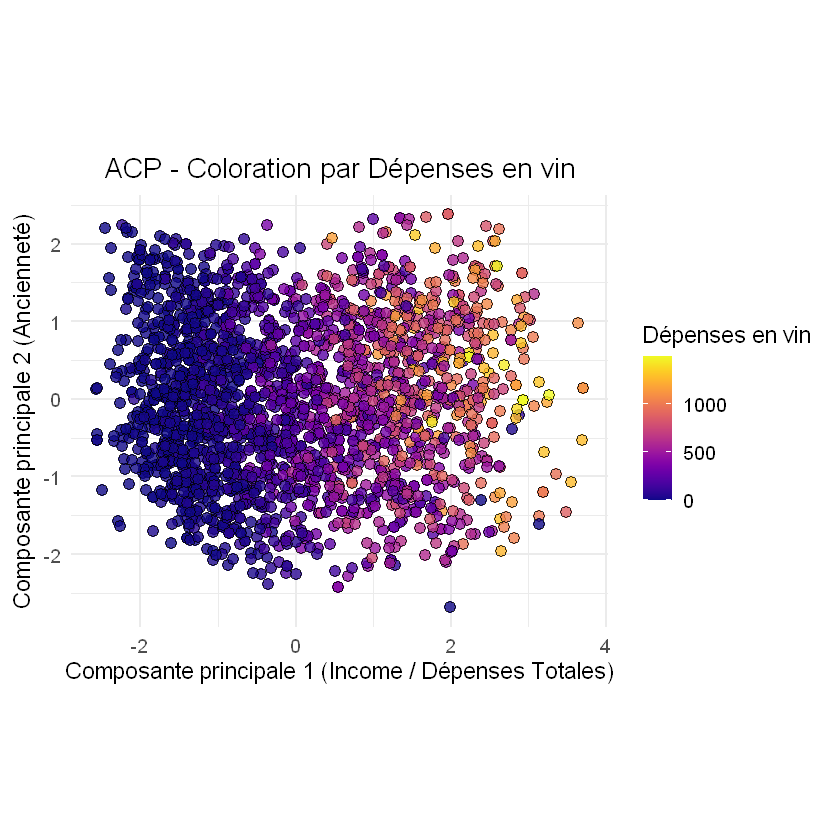

In [47]:
library(FactoMineR)
library(ggplot2)
library(viridis)

ind_coords <- as.data.frame(res_pca$ind$coord)
ind_coords$MntWines <- data_clean$MntWines
ggplot(ind_coords, aes(x = Dim.1, y = Dim.2, fill = MntWines)) +
  geom_point(shape = 21, color = "black", size = 3, alpha = 0.8) +
  scale_fill_viridis(option = "plasma", name = "Dépenses en vin") +
  labs(title = "ACP - Coloration par Dépenses en vin",
       x = "Composante principale 1 (Income / Dépenses Totales)",
       y = "Composante principale 2 (Ancienneté)") +
  theme_minimal(base_size = 14) +
  theme(plot.title = element_text(hjust = 0.5)) +
  coord_fixed()



On remarque que les personnes moins aisées dépensent très peu de vin et c'est cohérent. Tout d'abord car ils vont moins dépenser globalement donc cela implique limiter les "gros achats" comme du vin. Plus on évolue dans l'axe 1, plus les personnes sont aisées et vont généralement dépenser plus en vin ou du moins ils vont avoir le choix de le faire. Il existe plusieurs cas de personnes aisées qui dépensent pas beaucoup dans le vin car ce sont sûrement des gens qui n'aiment tout simplement pas le vin. Par contre il n'y a pas de cas de personnes avec une niveau de vie faible qui dépensent beaucoup dans le vin car elles ne peuvent pas se le permettre. Le long de l'axe 2, il n'y a pas de structure apparente. L'ancienneté ne semble pas influencer la consommation de vin.

On peut aussi discrétiser la dépense en vin en 2 catégories de même taille : Faible et Elevé puis faire un habillage selon ces classes pour solidifier nos hypothèses.

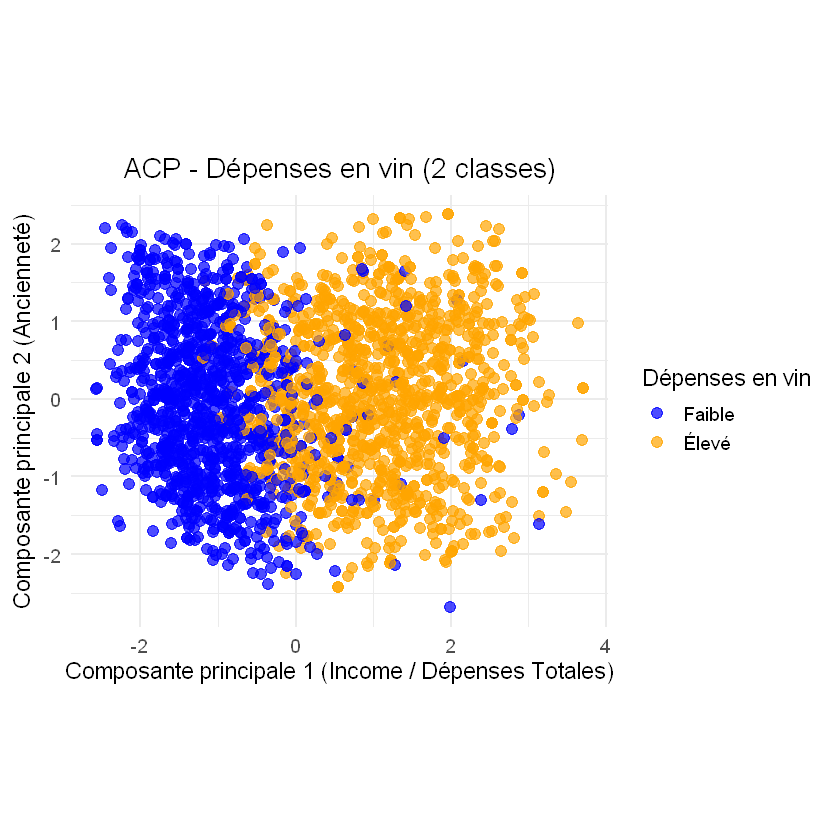

In [52]:
# Discrétisation en 2 groupes égaux
ind_coords <- as.data.frame(res_pca$ind$coord)
ind_coords$MntWines <- data_clean$MntWines

quantiles <- quantile(ind_coords$MntWines, probs = c(0, 0.5, 1))
ind_coords$Wines_Cat <- cut(ind_coords$MntWines,
                            breaks = quantiles,
                            include.lowest = TRUE,
                            labels = c("Faible", "Élevé"))
couleurs <- c("Faible" = "blue", "Élevé" = "orange") #pour garder les mêmes couleurs que sur Python
ggplot(ind_coords, aes(x = Dim.1, y = Dim.2, color = Wines_Cat)) +
  geom_point(size = 3, alpha = 0.7) +
  scale_color_manual(values = couleurs, name = "Dépenses en vin") +
  labs(title = "ACP - Dépenses en vin (2 classes)",
       x = "Composante principale 1 (Income / Dépenses Totales)",
       y = "Composante principale 2 (Ancienneté)") +
  theme_minimal(base_size = 14) +
  theme(plot.title = element_text(hjust = 0.5)) +
  coord_fixed()


On a clairement 2 clusters visibles. On peut s'intéresser à une autre catégorie de produits, les bonbons par exemple, pour voir si cette différence est autant marquée.

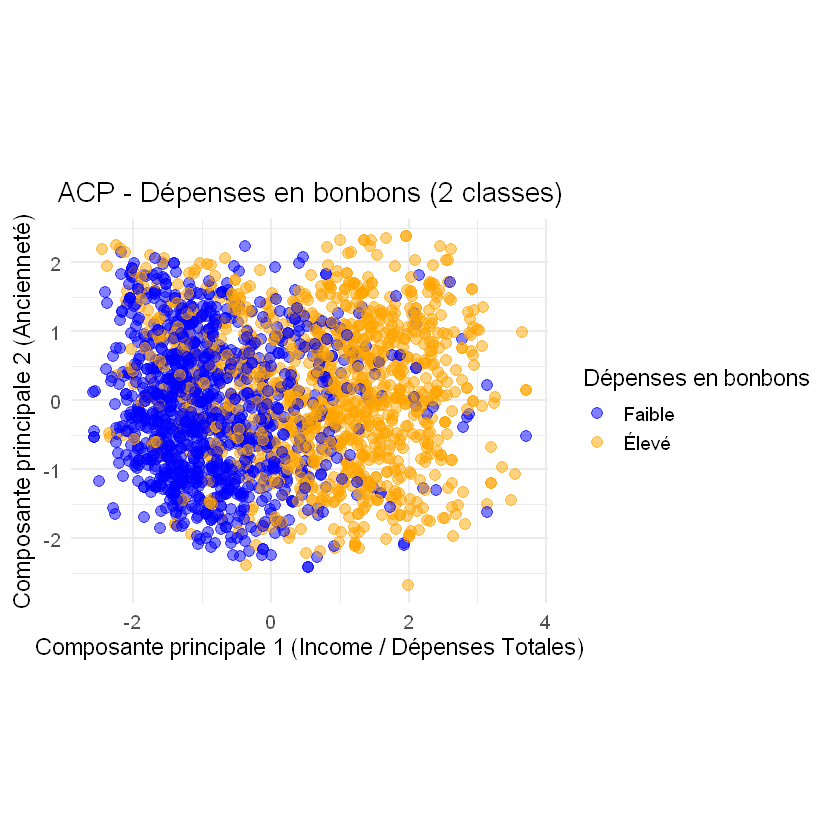

In [54]:
# Discrétisation en 2 groupes égaux sur MntSweetProducts
ind_coords <- as.data.frame(res_pca$ind$coord)
ind_coords$MntSweetProducts <- data_clean$MntSweetProducts
quantiles <- quantile(ind_coords$MntSweetProducts, probs = c(0, 0.5, 1))
ind_coords$S_Cat <- cut(ind_coords$MntSweetProducts,
                        breaks = quantiles,
                        include.lowest = TRUE,
                        labels = c("Faible", "Élevé"))
couleurs <- c("Faible" = "blue", "Élevé" = "orange")
ggplot(ind_coords, aes(x = Dim.1, y = Dim.2, color = S_Cat)) +
  geom_point(size = 3, alpha = 0.5) +
  scale_color_manual(values = couleurs, name = "Dépenses en bonbons") +
  labs(title = "ACP - Dépenses en bonbons (2 classes)",
       x = "Composante principale 1 (Income / Dépenses Totales)",
       y = "Composante principale 2 (Ancienneté)") +
  theme_minimal(base_size = 14) +
  theme(plot.title = element_text(hjust = 0.5)) +
  coord_fixed()


La projection de la consommation de bonbons sur le plan factoriel montre, contrairement aux dépenses en vin, une structure moins claire le long des axes principaux. Cette comparaison met en évidence que ce sont entre autres les dépenses en vin qui présentent une relation marquée avec les dimensions socio-économiques extraites par l’ACP. Ce produit parfois onéreux apparait ainsi comme un indicateur pertinent pour différencier les profils de clients, notamment en fonction de leur niveau de revenu ou de leur propension à dépenser.

Cette première analyse étant faite, on veut maintenant essayer de dessiner des profils types de clients en prenant en compte toutes les variables quantitatives.

## Quel est le profil des gens qui dépensent le plus (est ce qu’ils ont des enfants, sont-ils mariés ?...) 

Via l'ACP dans la section precédente, on remarque tout de même que les personnes qui dépensent le plus sont celles qui sont le plus influencées par les promotions.  On remarque aussi que la variable Income est trés corrélée avec celle de Total_Dépenses, ce qui nous dit (et cela est logique) que les personnes qui dépensent le plus sont celles avec le plus de revenus.

### AMC

L'objectif est de créer des profils types de clients pour essayer d'identifier ceux dépensant le plus, se basant sur les variables qualitatives.

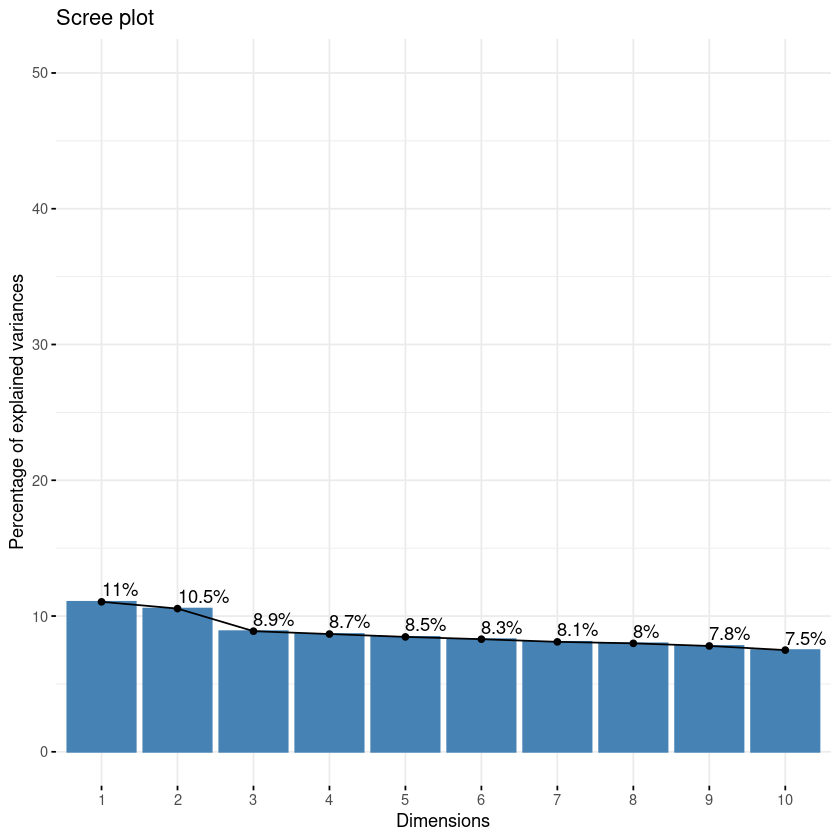

In [38]:
# Créer data_qual sans NA
data_qual <- na.omit(data_clean[, c("Education", "Marital_Status", "Age_Categorie", "Enfant", "Customer_Dt_Category")])

# Refaire AMC
mca <- MCA(data_qual, graph = FALSE, ncp = 10)

# le scree plot pour visualiser la chute des valeurs propres
fviz_screeplot(mca, addlabels = TRUE, ylim = c(0, 50))


Etant en MCA, il est normal que les valeurs propres soient plus faibles que en ACP. On va regarder le représentativité des variables sur les dimensions. 

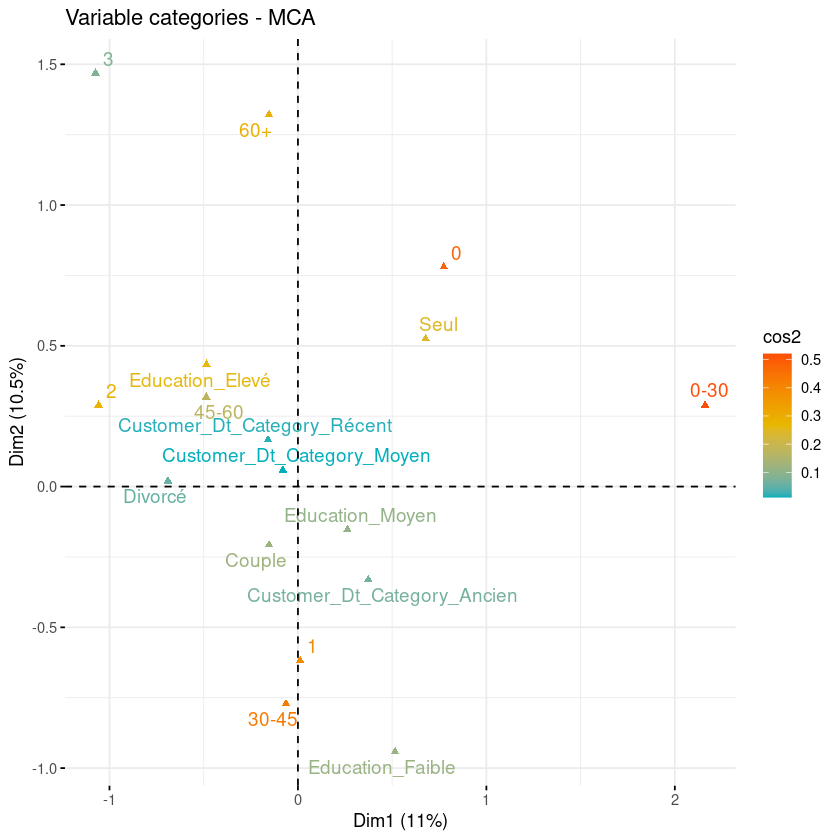

In [39]:
# Visualiser les modalités avec une couleur selon leur cos²
fviz_mca_var(mca, 
             col.var = "cos2",      # colorer par la qualité de représentation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),  # du bleu au rouge
             repel = TRUE)          # évite le chevauchement des label

On voit bien que kes variables mieux representées sont les ages (0-30, 0-45, 60+), l'éducation élevée, seul 

On va essayer de voir si naturellement des classes se forment en faisant des garphes d'individus et un habillage par variables.

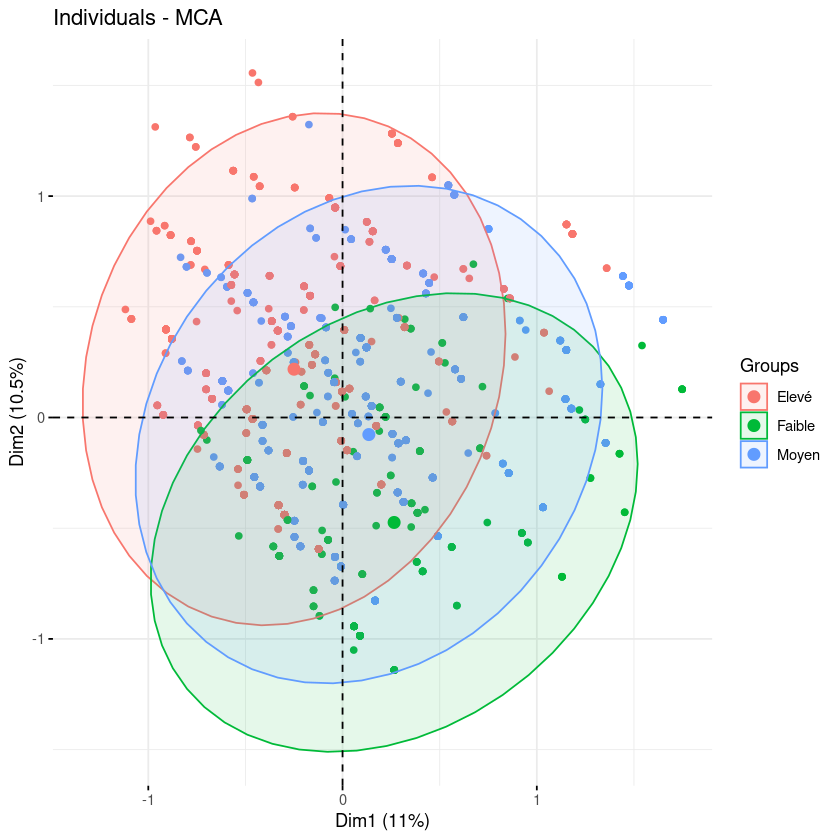

In [40]:
# Visualisation avec habillage par 'Education'
fviz_mca_ind(mca, label = "none", habillage = data_qual$Education, addEllipses = TRUE)

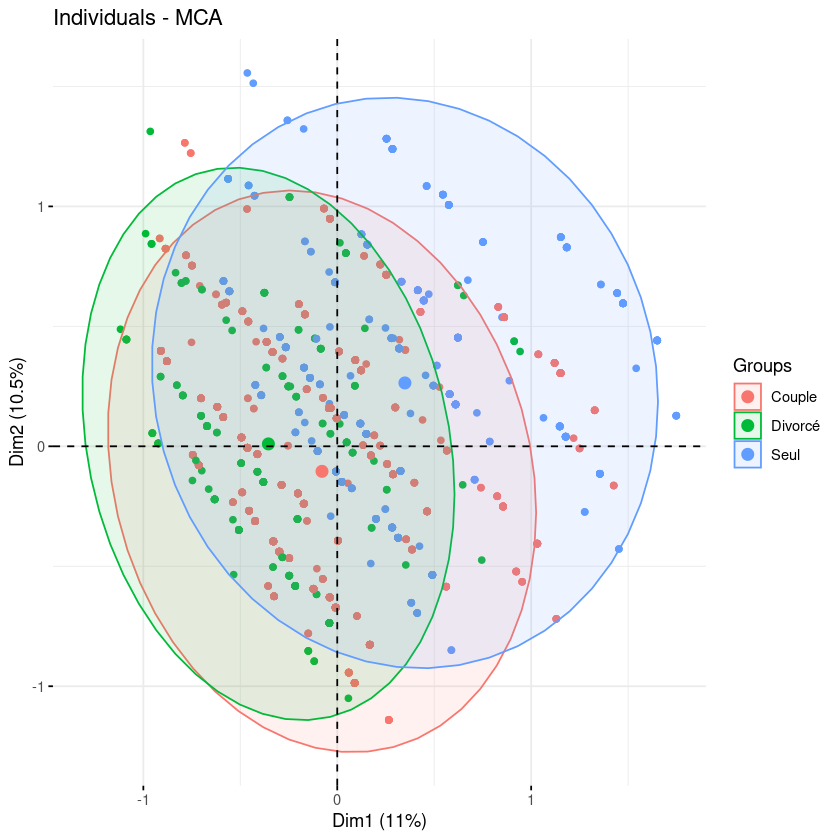

In [41]:
# Visualisation avec habillage par 'Marital_Status'
fviz_mca_ind(mca, label = "none", habillage = data_qual$Marital_Status, addEllipses = TRUE)

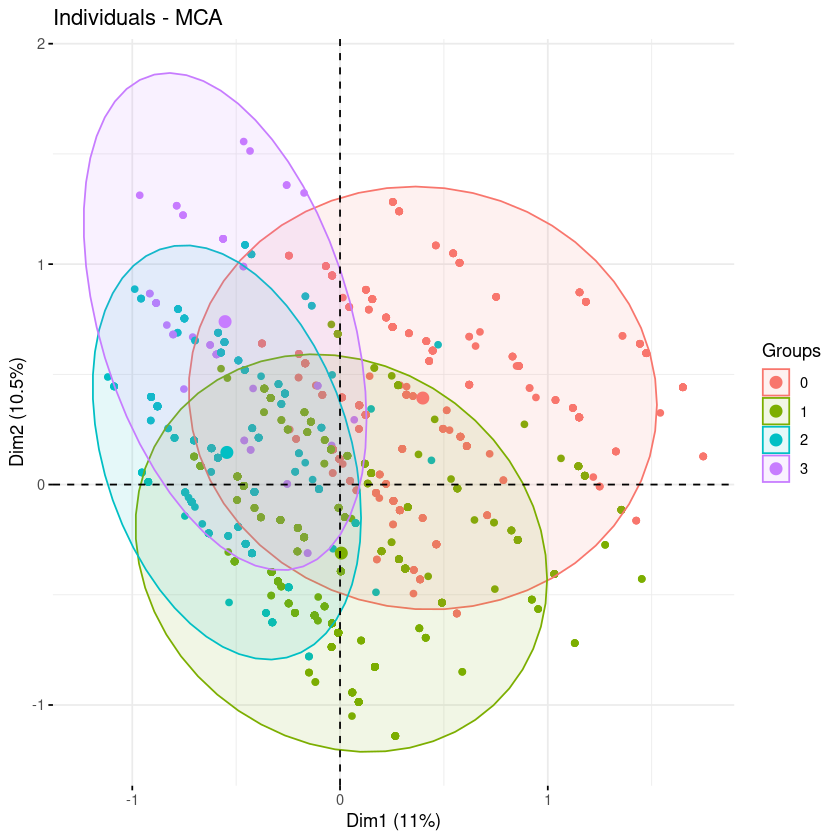

In [42]:
# Visualisation avec habillage par 'Enfants'
fviz_mca_ind(mca, label = "none", habillage = data_qual$Enfant, addEllipses = TRUE)

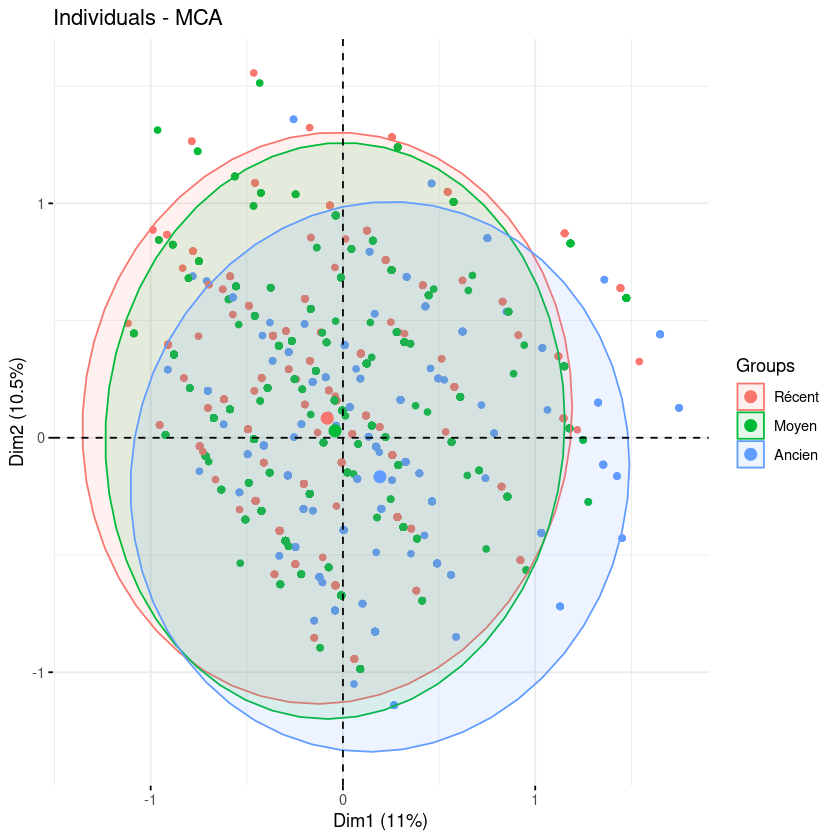

In [43]:
# Visualisation avec habillage par 'Customer_Dt_Category'
fviz_mca_ind(mca, label = "none", habillage = data_qual$Customer_Dt_Category, addEllipses = TRUE)

Il n'y a pas de difference entre les membre récents, moyens et anciens.

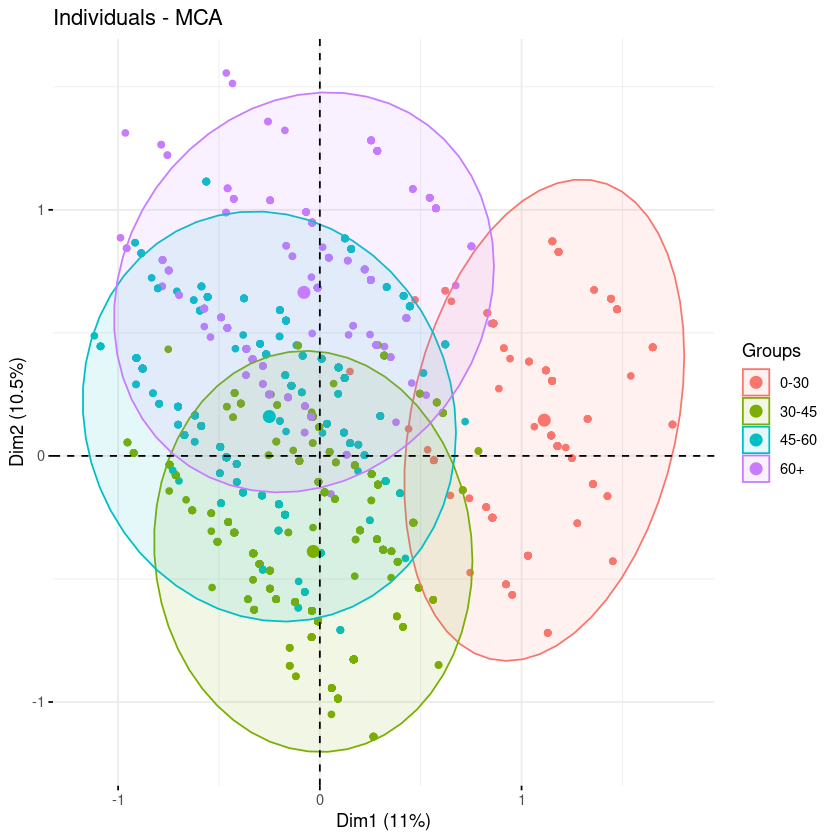

In [44]:
# Visualisation avec habillage par "Age_Categorie'
fviz_mca_ind(mca, label = "none", habillage = data_qual$Age_Categorie, addEllipses = TRUE)

On peut remarquer que le groupe des individus de 0-30 se différencie par rapport au autres catégories d'age sur la dim 1. A l'inverse, sur la dim 2, se sont les catégories d'age 60+ et 30-45 qui s'opposent (on n'analyse pas la catégorie 45-60 vu qu'elle n'est pas bien réprésentée).

On peut voir un groupe s'extraire de cette analyse : les 0-30 ans qui sont seuls et sans enfant, qui s'oppose sur la dimension 1 aux autres catégories d'age qui ont des enfants et qui sont soit en couple soit divorcés.

Nous allons utiliser une méthode de clustering pour mieux catégoriser, en testant d'abord Kmean puis GMM.

#### K-means

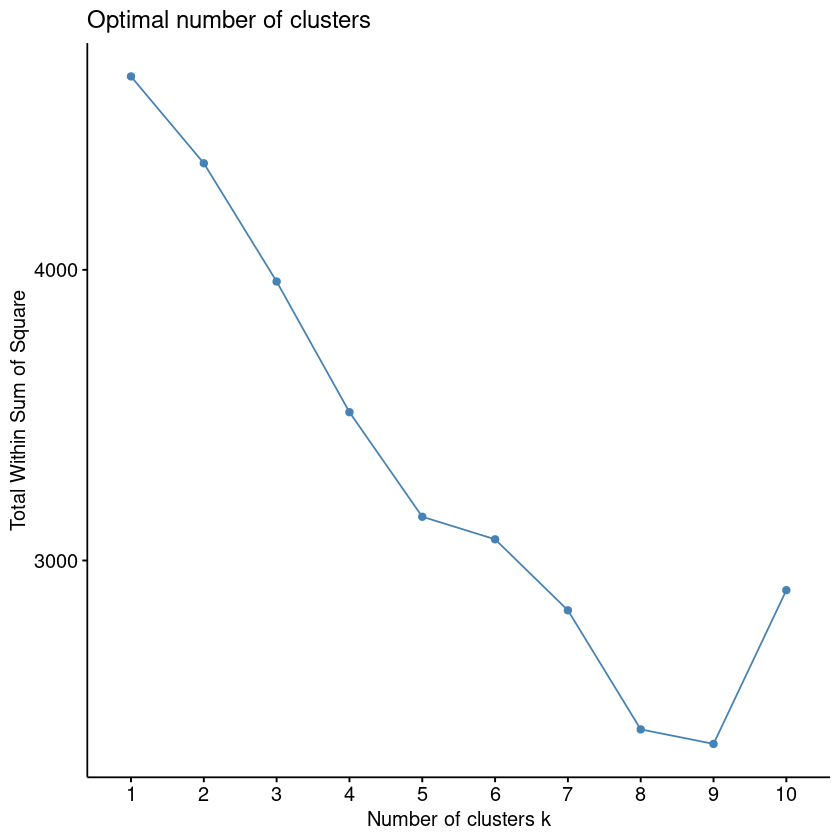

In [45]:
#on a gardé 5 dimensions
data_kmeans <- mca$ind$coord

# Elbow method pour choisir k optimal
fviz_nbclust(data_kmeans, kmeans, method = "wss")

Nous allons séparer en  5 classes.

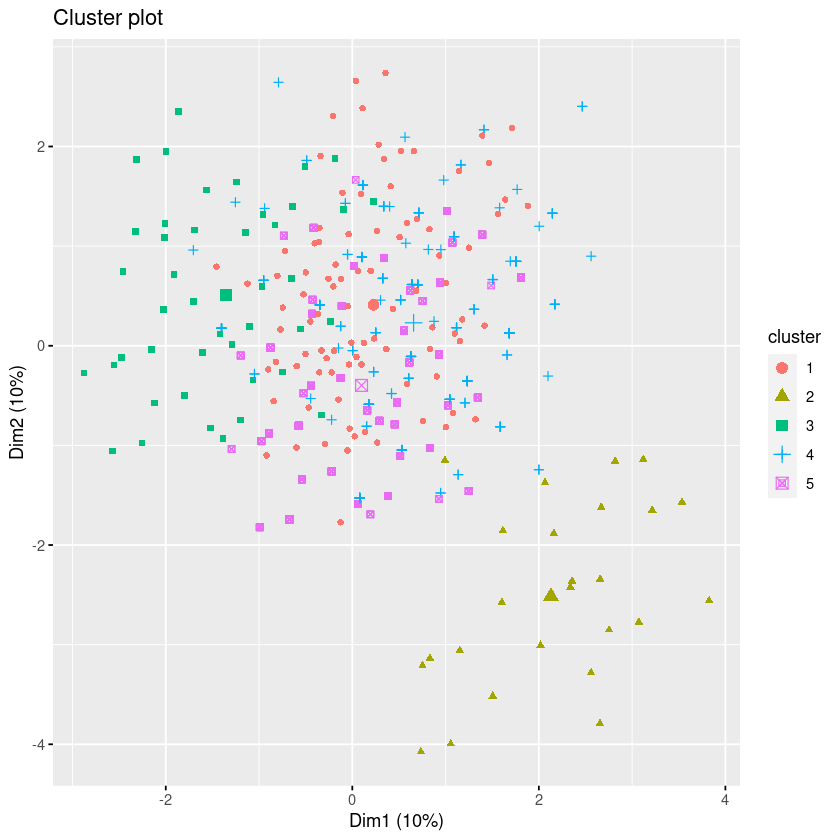

In [46]:
res_km <- kmeans(data_kmeans, centers = 5, nstart = 42)
fviz_cluster(list(data = data_kmeans, cluster = res_km$cluster), geom = "point",ellipse = FALSE)

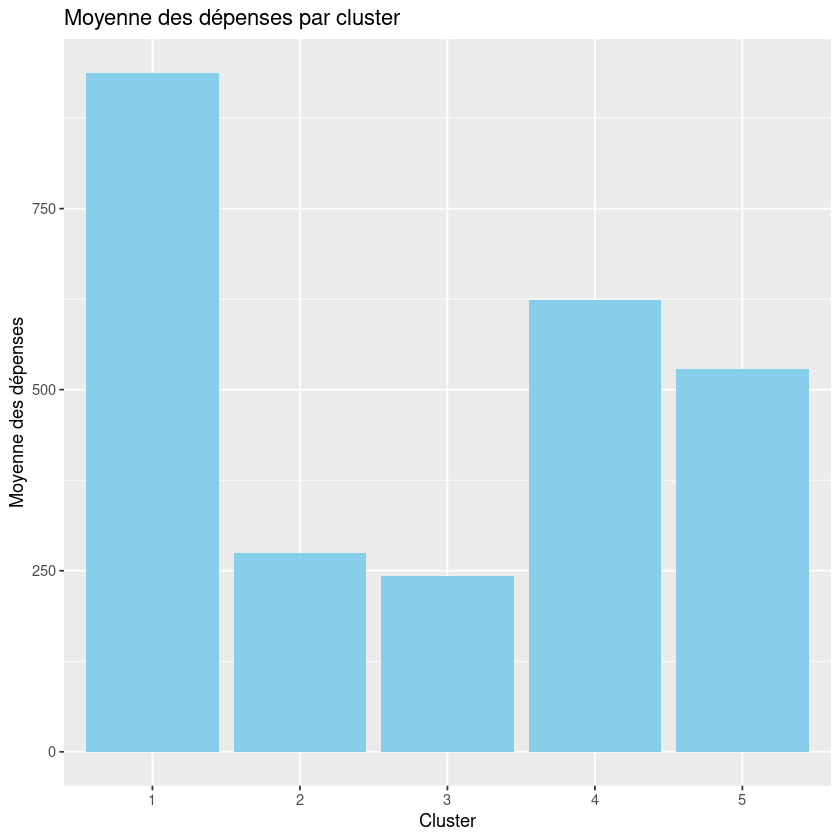

In [47]:
moyenne_depenses <- tapply(data_clean$Total_Depense, res_km$cluster, mean)
# Créer un dataframe avec les moyennes des dépenses par cluster
moyennes_df <- data.frame(cluster = as.factor(1:5), moyenne_depenses = moyenne_depenses)

# Visualiser avec ggplot
ggplot(moyennes_df, aes(x = cluster, y = moyenne_depenses)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  ggtitle("Moyenne des dépenses par cluster") +
  xlab("Cluster") +
  ylab("Moyenne des dépenses")

Info sur le cluster 3 (depensent le moins):

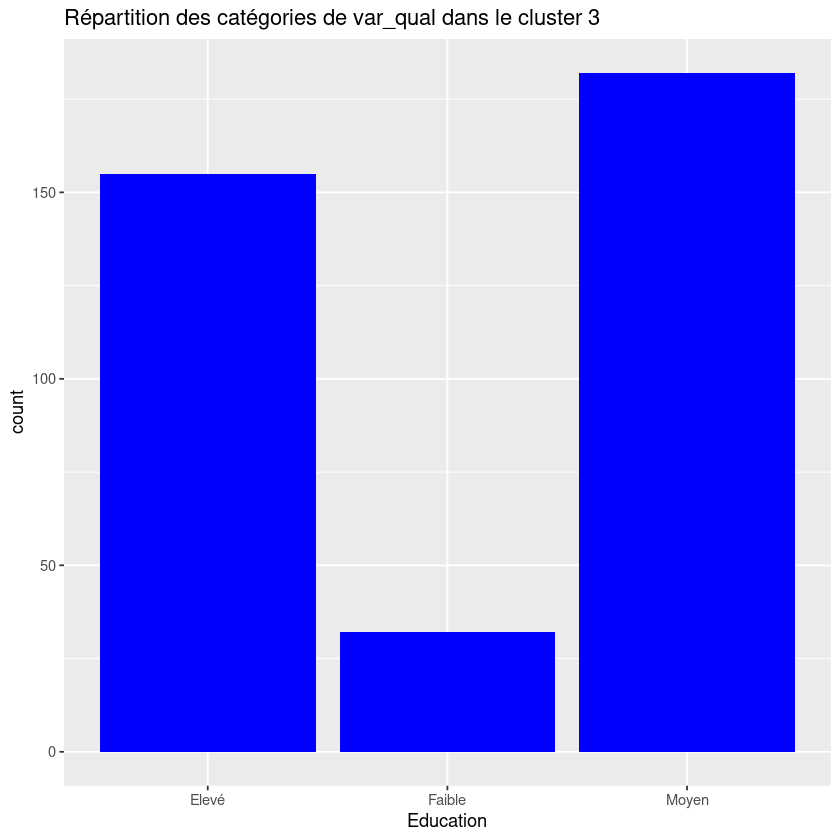

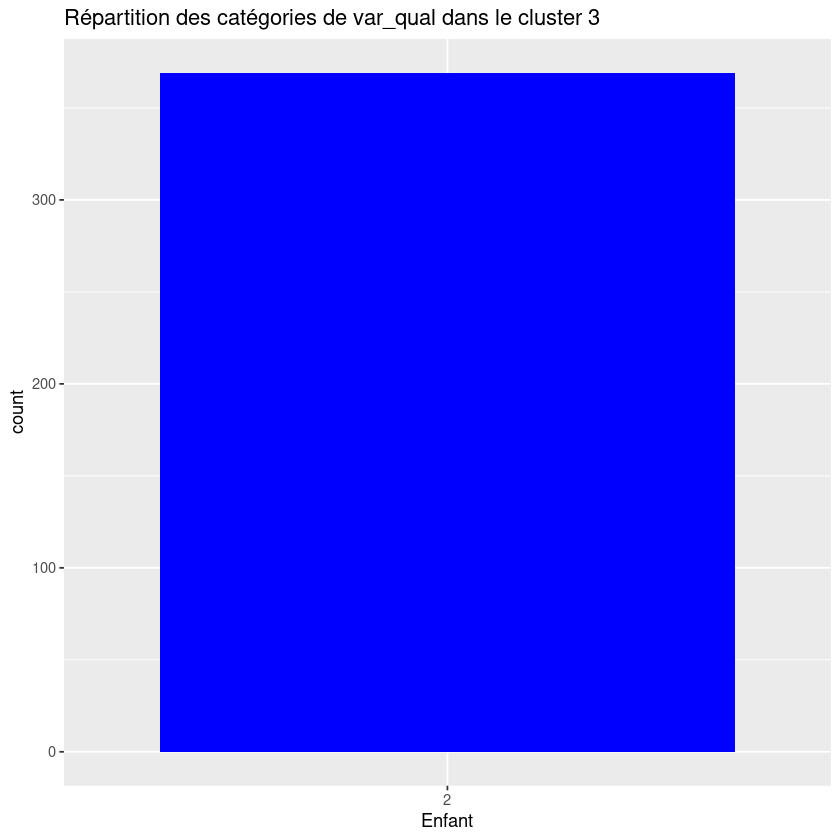

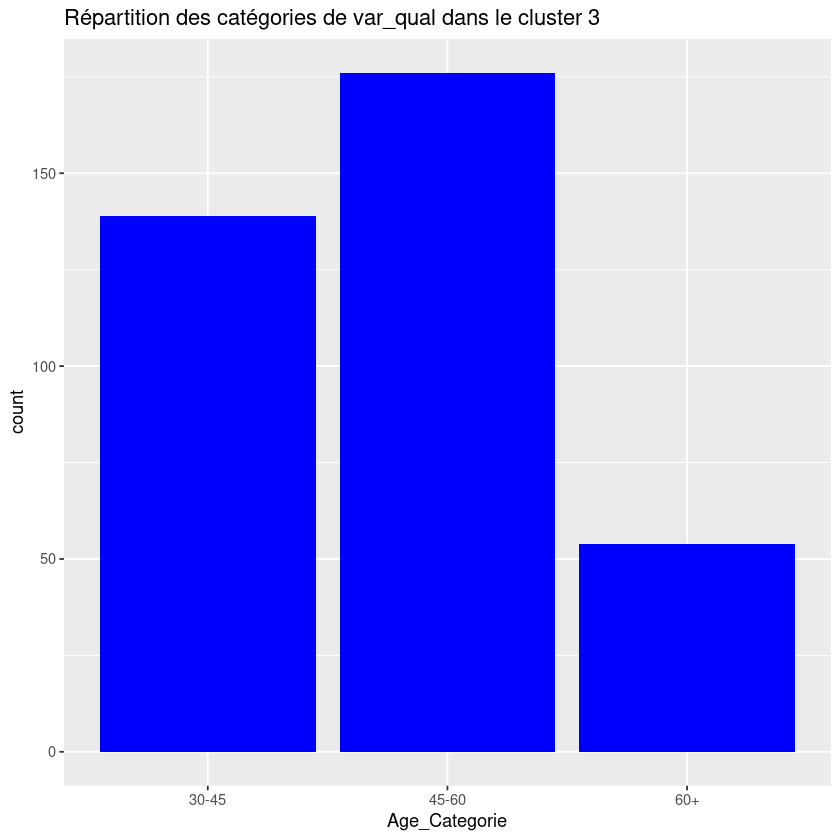

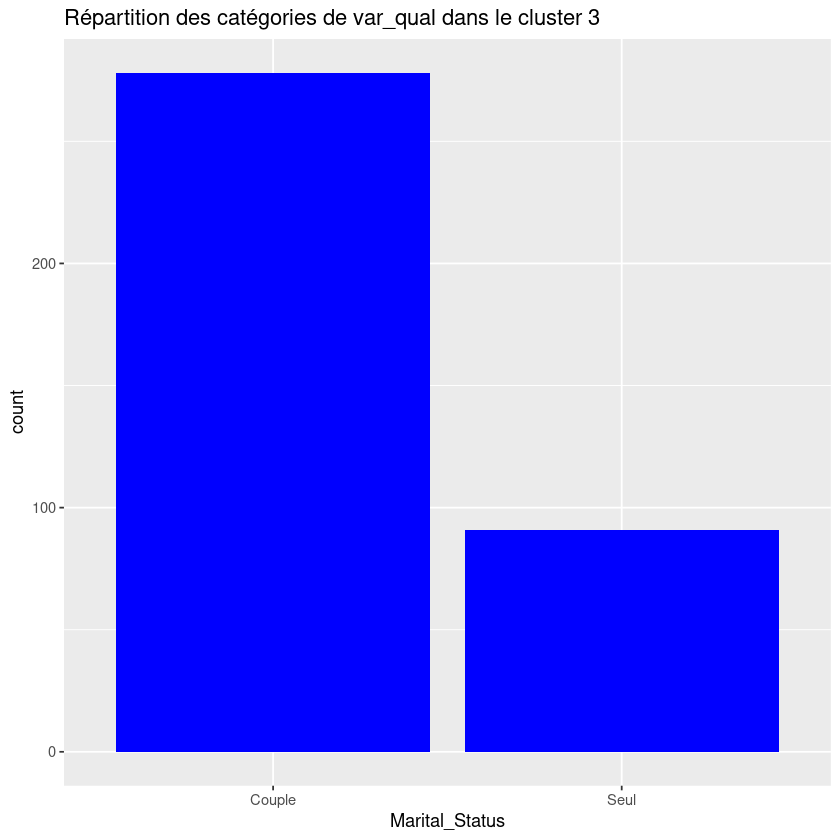

In [48]:
cluster_3_data <- data_clean[res_km$cluster == 3, ]

ggplot(cluster_3_data, aes(x = Education)) +
  geom_bar(fill = "blue") +
  ggtitle("Répartition des catégories de var_qual dans le cluster 3")

ggplot(cluster_3_data, aes(x = Enfant)) +
  geom_bar(fill = "blue") +
  ggtitle("Répartition des catégories de var_qual dans le cluster 3")

ggplot(cluster_3_data, aes(x = Age_Categorie)) +
  geom_bar(fill = "blue") +
  ggtitle("Répartition des catégories de var_qual dans le cluster 3")

ggplot(cluster_3_data, aes(x = Marital_Status)) +
  geom_bar(fill = "blue") +
  ggtitle("Répartition des catégories de var_qual dans le cluster 3")



Analyse du cluster 1 (qui dépensent le plus)

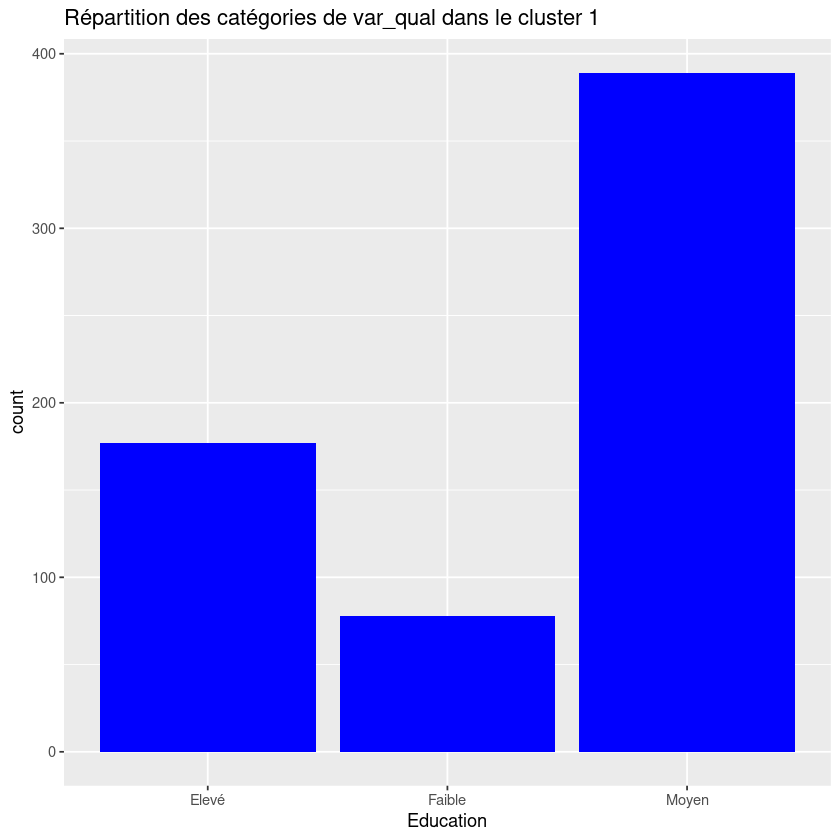

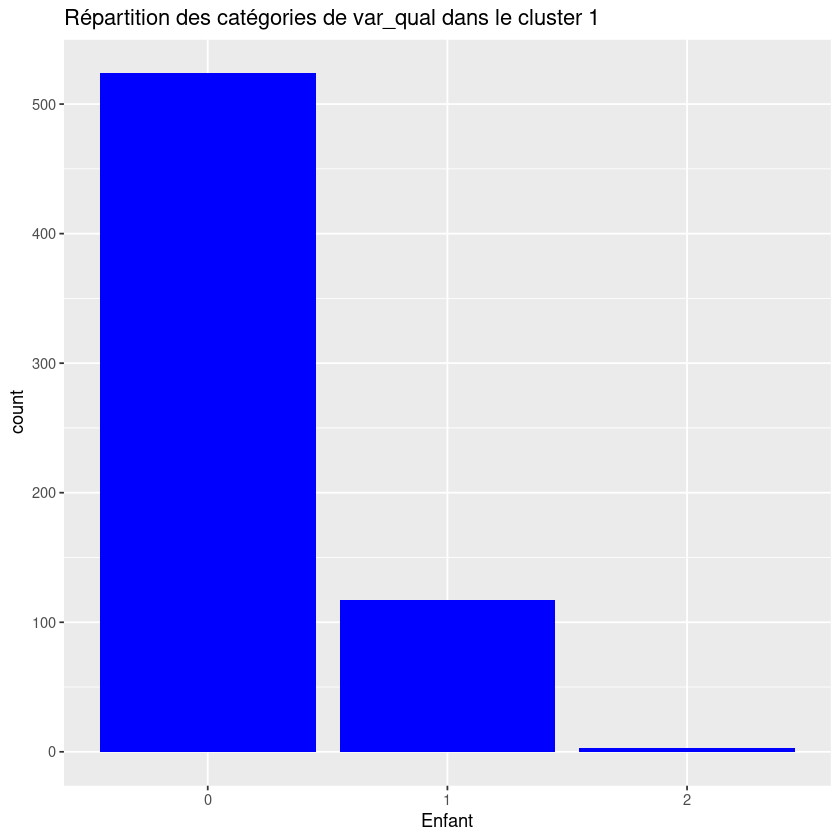

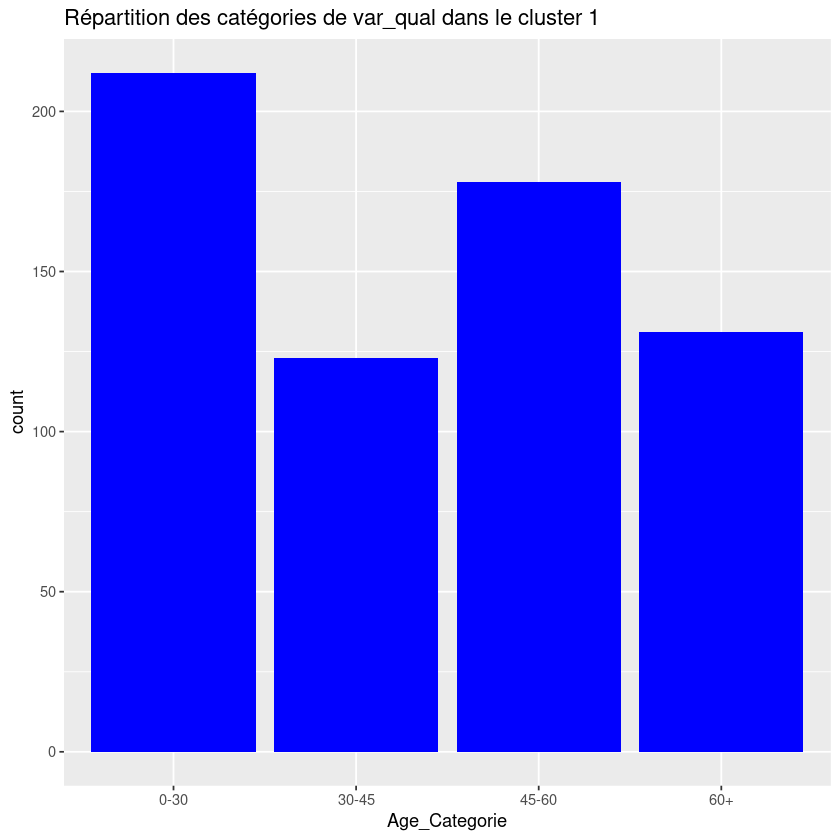

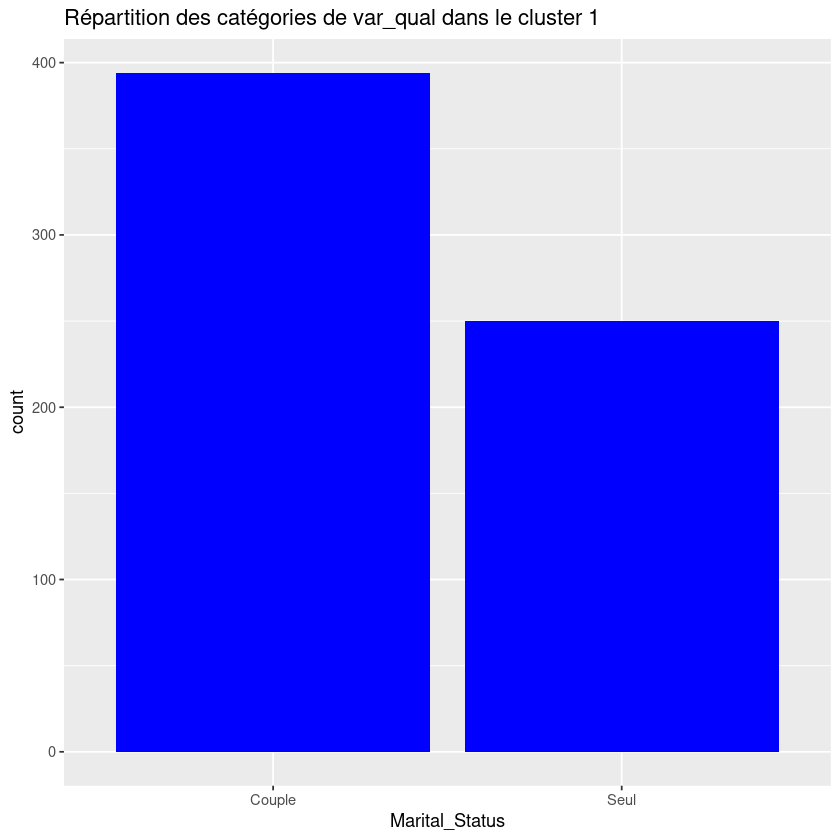

In [49]:
cluster_1_data <- data_clean[res_km$cluster == 1, ]

ggplot(cluster_1_data, aes(x = Education)) +
  geom_bar(fill = "blue") +
  ggtitle("Répartition des catégories de var_qual dans le cluster 1")

ggplot(cluster_1_data, aes(x = Enfant)) +
  geom_bar(fill = "blue") +
  ggtitle("Répartition des catégories de var_qual dans le cluster 1")

ggplot(cluster_1_data, aes(x = Age_Categorie)) +
  geom_bar(fill = "blue") +
  ggtitle("Répartition des catégories de var_qual dans le cluster 1")

ggplot(cluster_1_data, aes(x = Marital_Status)) +
  geom_bar(fill = "blue") +
  ggtitle("Répartition des catégories de var_qual dans le cluster 1")


### GMM

In [50]:
set.seed(5)
library(mclust)

coord_amc<- mca$ind$coord
# Appliquer GMM sur les coordonnées AMC
gmm_model <- Mclust(coord_amc)

# Afficher le résumé
summary(gmm_model)

Package 'mclust' version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 4 components: 

 log-likelihood    n  df       BIC       ICL
      -2830.813 2227 233 -7457.686 -7462.889

Clustering table:
   1    2    3    4 
 299  437 1438   53 

In [51]:
data_clean$Cluster_GMM <- as.factor(gmm_model$classification)


In [52]:
data_clean %>%
  group_by(Cluster_GMM) %>%
  summarise(Depense_Moyenne = mean(Total_Depense, na.rm = TRUE),
            Nombre_Clients = n())

Cluster_GMM,Depense_Moyenne,Nombre_Clients
<fct>,<dbl>,<int>
1,691.6823,299
2,647.6773,437
3,583.3707,1438
4,274.6038,53


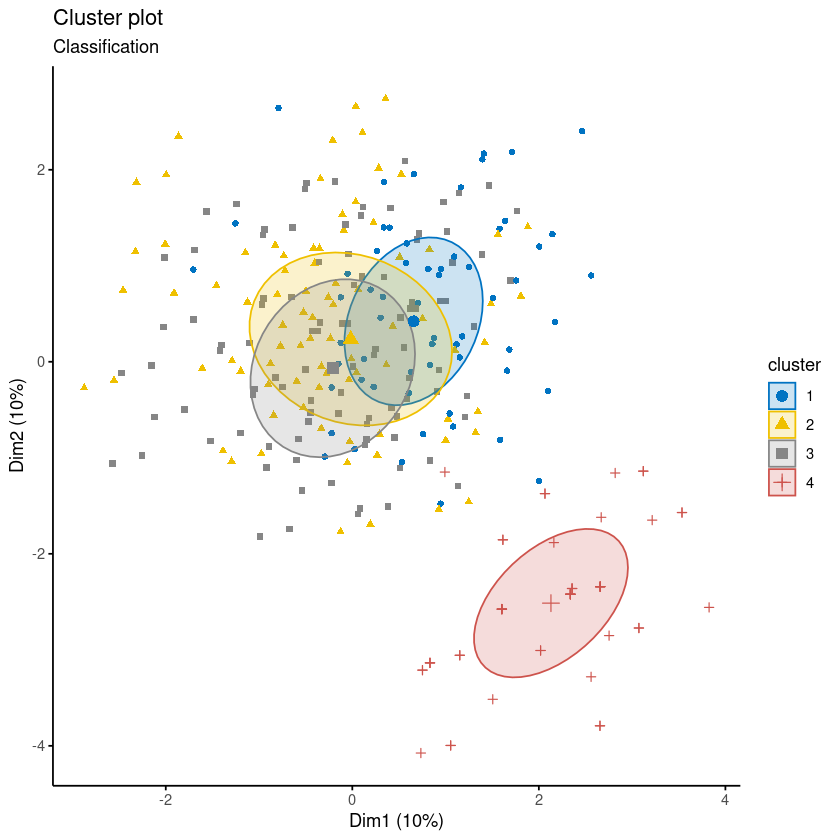

In [53]:
fviz_mclust(gmm_model, "classification", geom = "point", ellipse.type = "norm", palette = "jco")

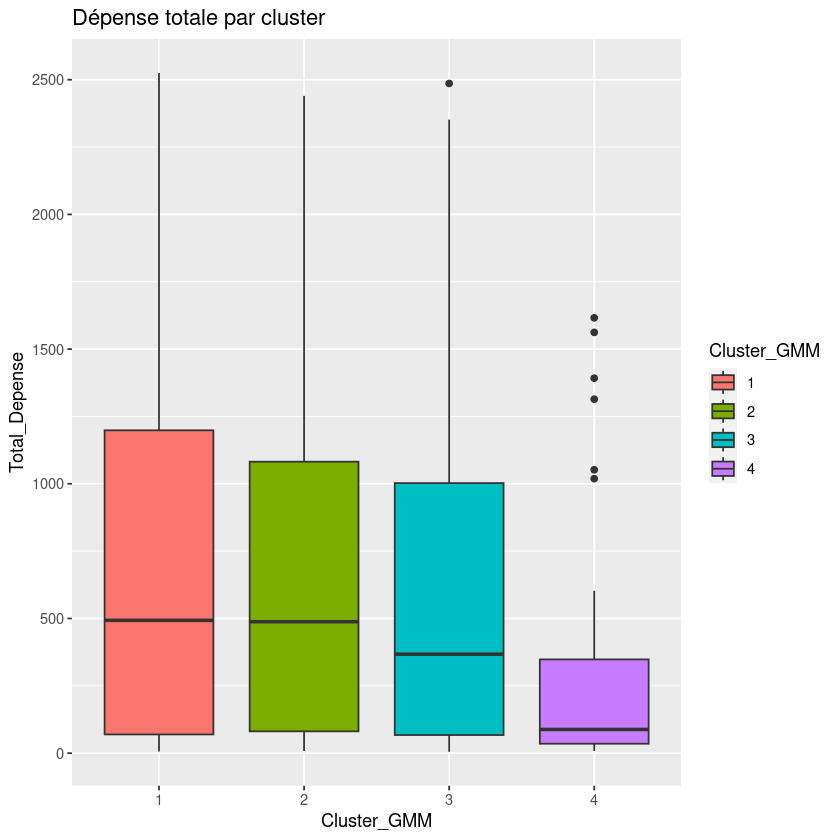

In [54]:
ggplot(data_clean, aes(x = Cluster_GMM, y = Total_Depense, fill = Cluster_GMM)) +
  geom_boxplot() +
  labs(title = "Dépense totale par cluster")

In [55]:
# Calculer la dépense moyenne par cluster
depenses_clusters <- data_clean %>%
  group_by(Cluster_GMM) %>%
  summarise(Depense_Moyenne = mean(Total_Depense, na.rm = TRUE)) %>%
  arrange(desc(Depense_Moyenne))

depenses_clusters #classe les cluster du plus au moins dépensier

cluster_top <- depenses_clusters$Cluster_GMM[1]  # ID du cluster avec dépense max

# Filtrer les clients de ce cluster
data_top <- data_clean %>% filter(Cluster_GMM == cluster_top)

Cluster_GMM,Depense_Moyenne
<fct>,<dbl>
1,691.6823
2,647.6773
3,583.3707
4,274.6038


In [56]:
summary(data_top[, c("Education", "Marital_Status", "Age_Categorie", "Enfant", "Customer_Dt_Category")])

  Education   Marital_Status Age_Categorie Enfant  Customer_Dt_Category
 Elevé : 90   Couple :100    0-30 :189     0:136   Récent: 66          
 Faible: 22   Divorcé:118    30-45: 10     1:160   Moyen :164          
 Moyen :187   Seul   : 81    45-60: 73     2:  3   Ancien: 69          
                             60+  : 27     3:  0                       

In [57]:
prop.table(table(data_top$Education))/prop.table(table(data_clean$Education))


    Elevé    Faible     Moyen 
0.7886288 0.8192977 1.1833526 

In [58]:
prop.table(table(data_top$Marital_Status))/prop.table(table(data_clean$Marital_Status))


   Couple   Divorcé      Seul 
0.5183132 3.8046881 1.0792505 

In [59]:
prop.table(table(data_top$Age_Categorie))/prop.table(table(data_clean$Age_Categorie))


      0-30      30-45      45-60        60+ 
6.39864701 0.07965947 0.71920069 0.63639346 

In [60]:
prop.table(table(data_top$Enfant))/prop.table(table(data_clean$Enfant))


         0          1          2          3 
1.60276872 1.06307376 0.05307478 0.00000000 

On peut interpreter que le groupe dépensant le plus est celui sans enfant, jeune.

Nous allons faire un clustering DBScan pour appronfondir notre clustering et comfirmer ces groupes (qui sont aléatoires dans le cas du GMM).

### CAH

In [61]:
# Extraire les cinq premières composantes principales
acp_scores <- acp$ind$coord[, 1:5] 
dist_matrix <- dist(acp_scores, method = "euclidean")
cah_result <- hclust(dist_matrix, method = "ward.D2")

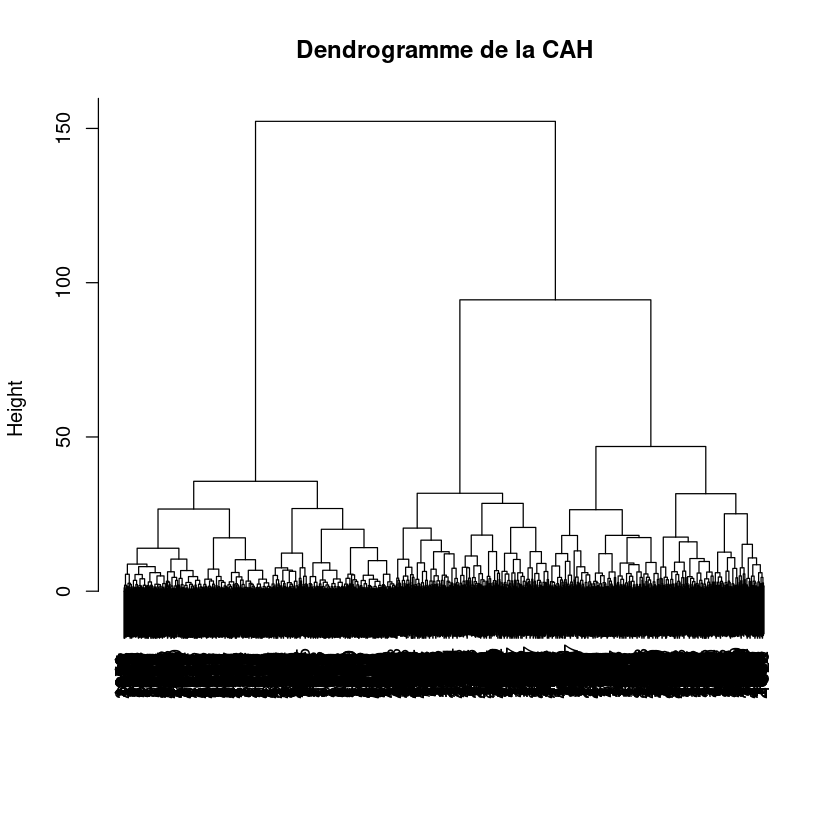

In [62]:
plot(cah_result, main = "Dendrogramme de la CAH", xlab = "", sub = "")

In [63]:
# Découper l'arbre en 4 clusters
clusters <- cutree(cah_result, k = 3)

# Afficher les clusters
table(clusters)

clusters
  1   2   3 
534 948 745 

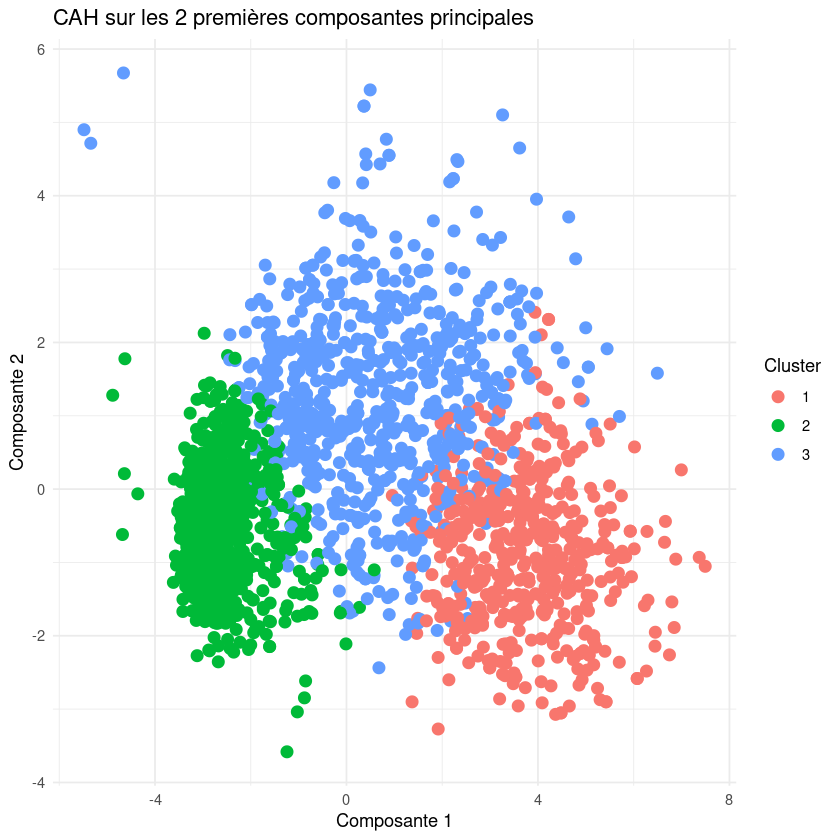

In [64]:
#Ajouter les clusters au score des composantes principales
acp_scores_df <- data.frame(acp_scores, Cluster = as.factor(clusters))
# Associer les clusters aux données
data_with_clusters <- cbind(col_acp, Cluster = as.factor(clusters))
# Visualiser les clusters sur les 2 premières composantes principales, la dim 1 expliquant trés bien le Total des dépenses
library(ggplot2)
ggplot(acp_scores_df, aes(x = Dim.1, y = Dim.2, color = Cluster)) +
  geom_point(size = 3) +
  labs(title = "CAH sur les 2 premières composantes principales", x = "Composante 1", y = "Composante 2") +
  theme_minimal()

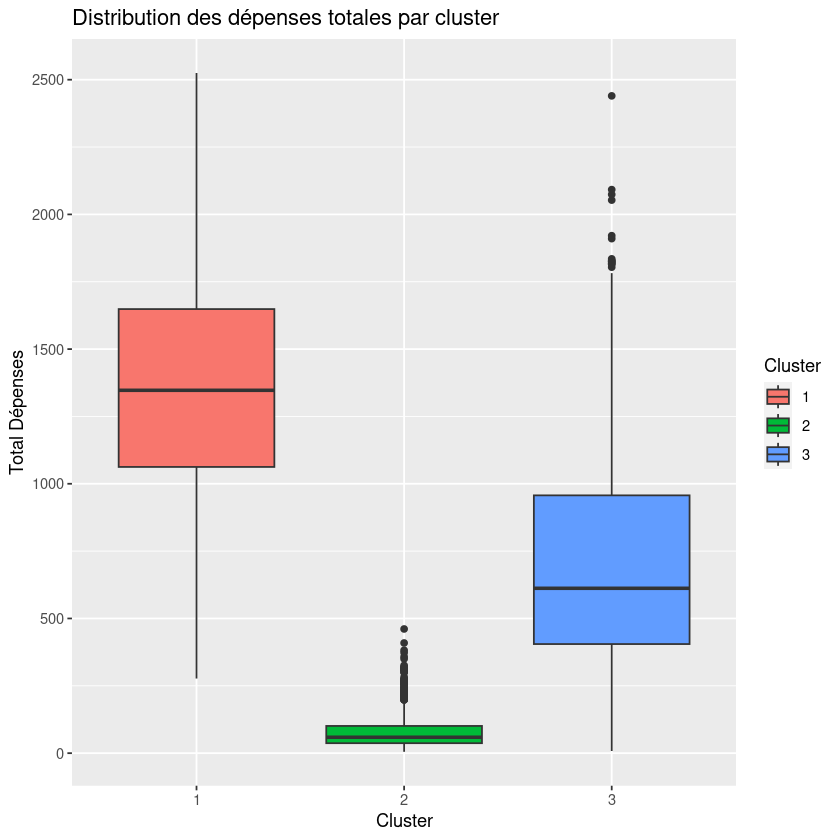

In [65]:
# Visualiser la distribution des variables quantitatives par cluster
ggplot(data_with_clusters, aes(x = Cluster, y = Total_Depense, fill = Cluster)) +
  geom_boxplot() +
  labs(title = "Distribution des dépenses totales par cluster", x = "Cluster", y = "Total Dépenses")

On remarque que la classe 1 est trés corrélée avec la dim 1 de l'ACP qui représentée trés bien le Total de dépense. Cela se traduit trés bien dans les boxplots, ou la classe 1 dépense bcp plus que les autres.

Analysons la :

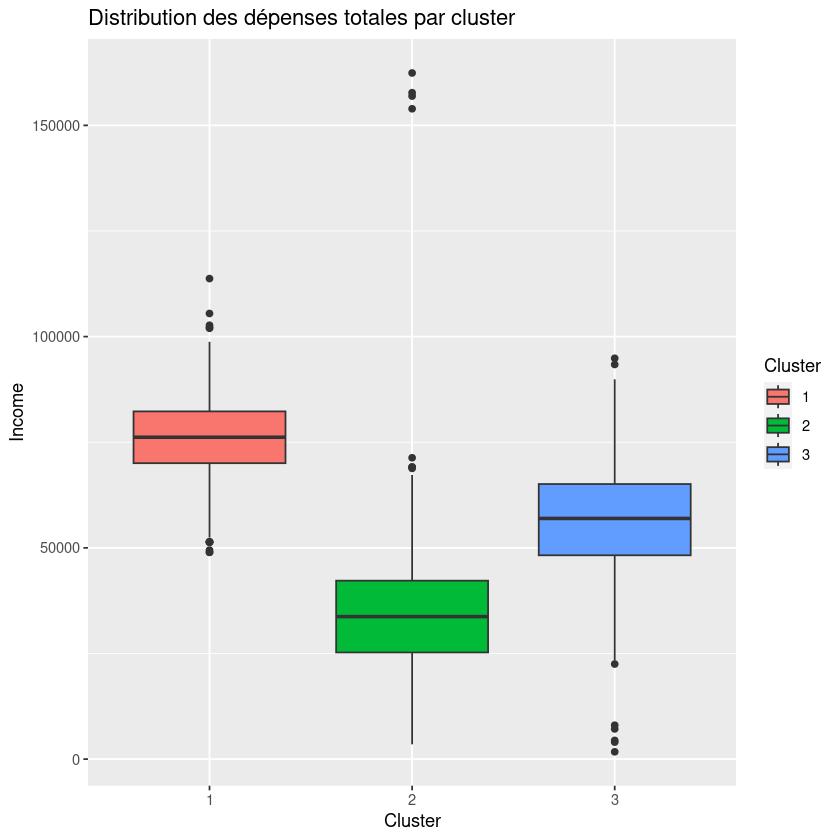

In [66]:
ggplot(data_with_clusters, aes(x = Cluster, y = Income, fill = Cluster)) +
  geom_boxplot() +
  labs(title = "Distribution des dépenses totales par cluster", x = "Cluster", y = "Income")

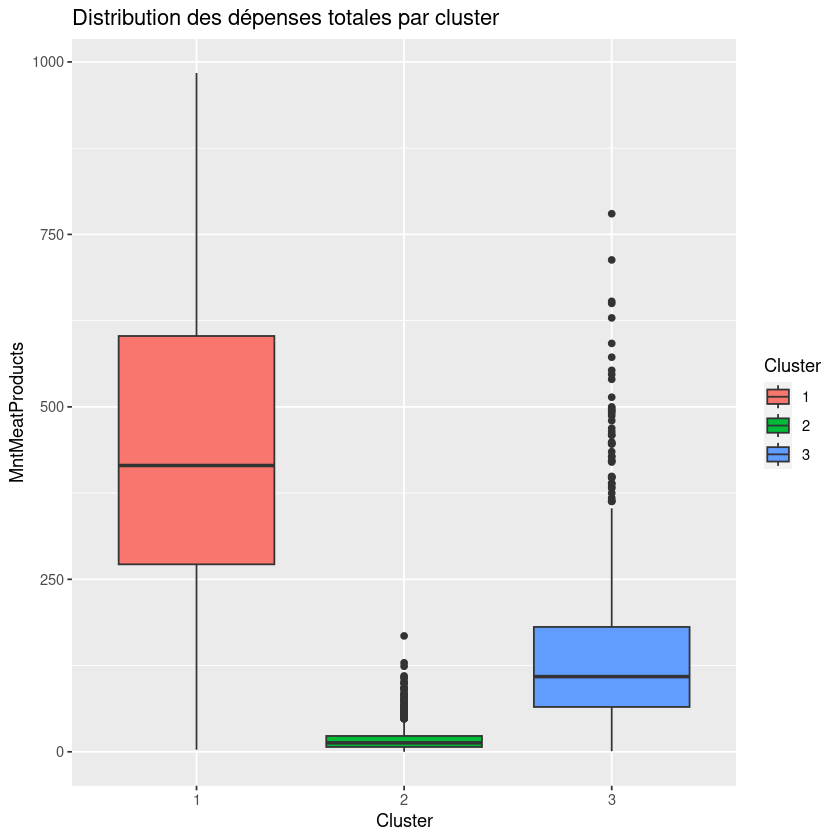

In [67]:
ggplot(data_with_clusters, aes(x = Cluster, y = MntMeatProducts, fill = Cluster)) +
  geom_boxplot() +
  labs(title = "Distribution des dépenses totales par cluster", x = "Cluster", y = "MntMeatProducts")

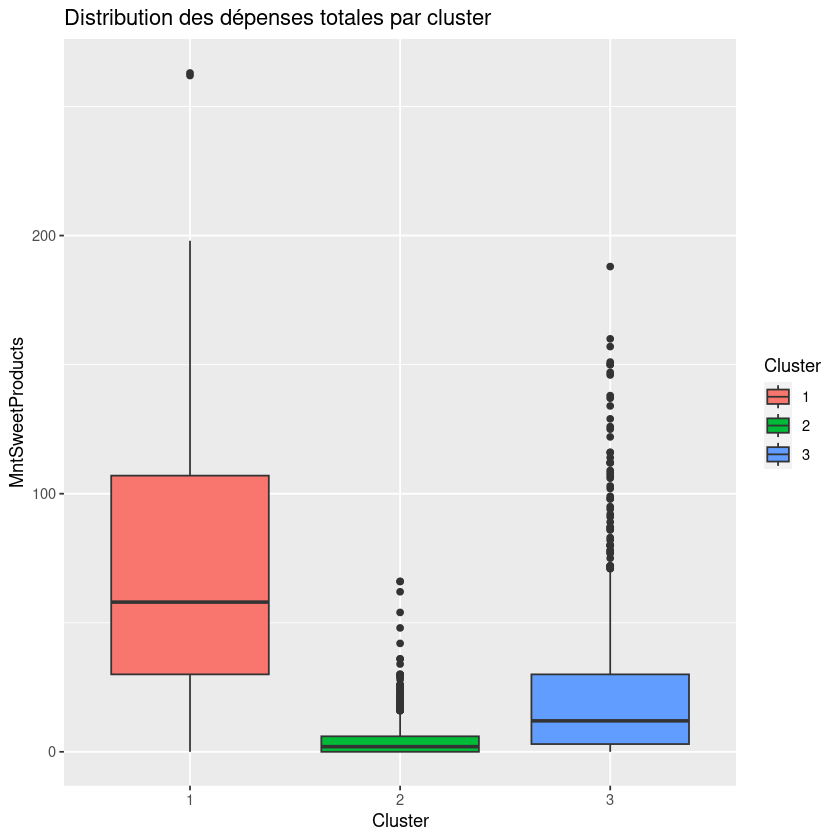

In [68]:
ggplot(data_with_clusters, aes(x = Cluster, y = MntSweetProducts, fill = Cluster)) +
  geom_boxplot() +
  labs(title = "Distribution des dépenses totales par cluster", x = "Cluster", y = "MntSweetProducts")

Bon en gros ca suit vraiment la dimension 1.

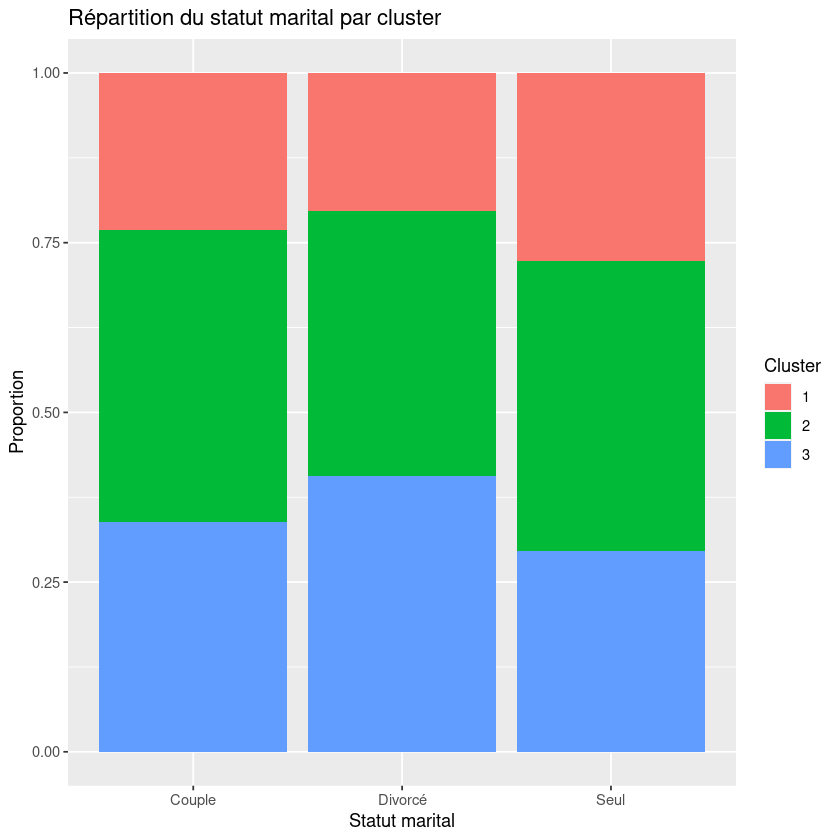

In [69]:
ggplot(data_with_clusters, aes(x = Marital_Status, fill = Cluster)) +
  geom_bar(position = "fill") +
  labs(title = "Répartition du statut marital par cluster", x = "Statut marital", y = "Proportion")

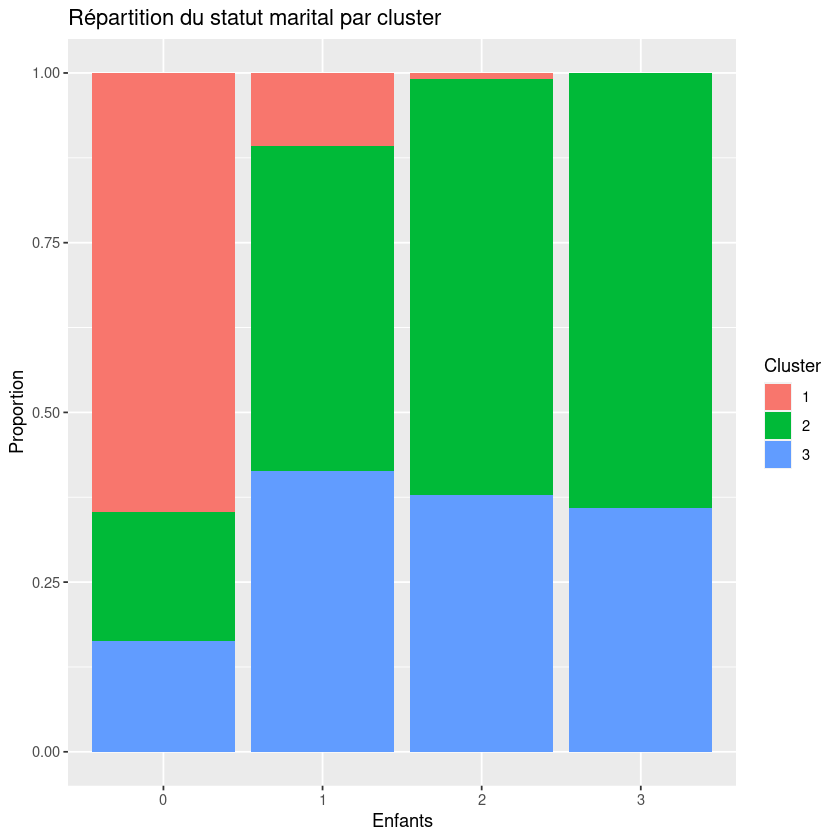

In [70]:
ggplot(data_with_clusters, aes(x = Enfant, fill = Cluster)) +
  geom_bar(position = "fill") +
  labs(title = "Répartition du statut marital par cluster", x = "Enfants", y = "Proportion")

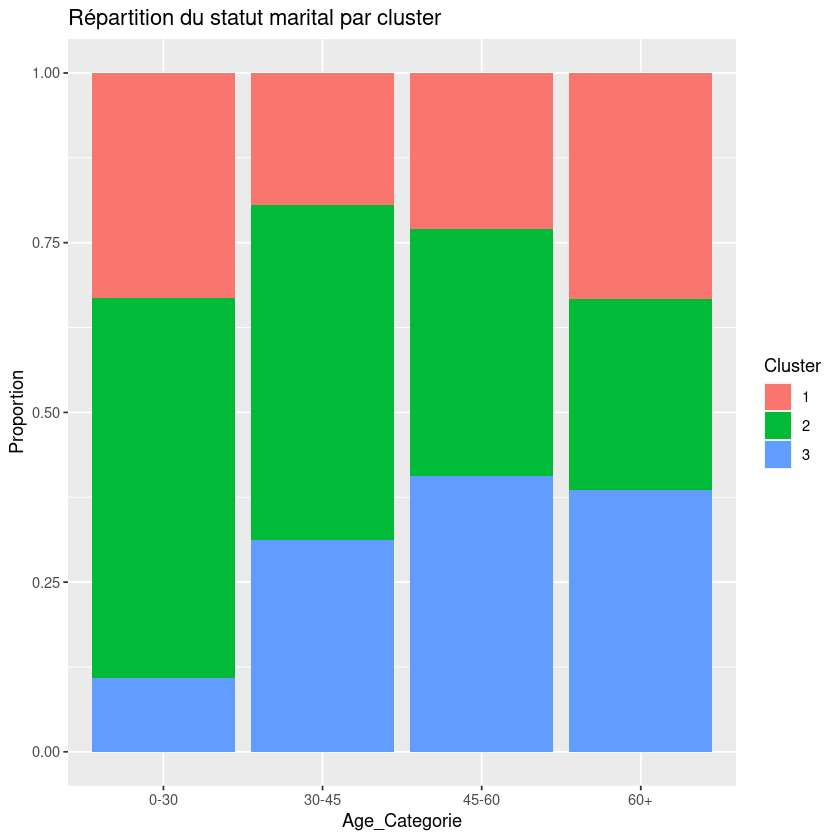

In [71]:
ggplot(data_with_clusters, aes(x = Age_Categorie, fill = Cluster)) +
  geom_bar(position = "fill") +
  labs(title = "Répartition du statut marital par cluster", x = "Age_Categorie", y = "Proportion")

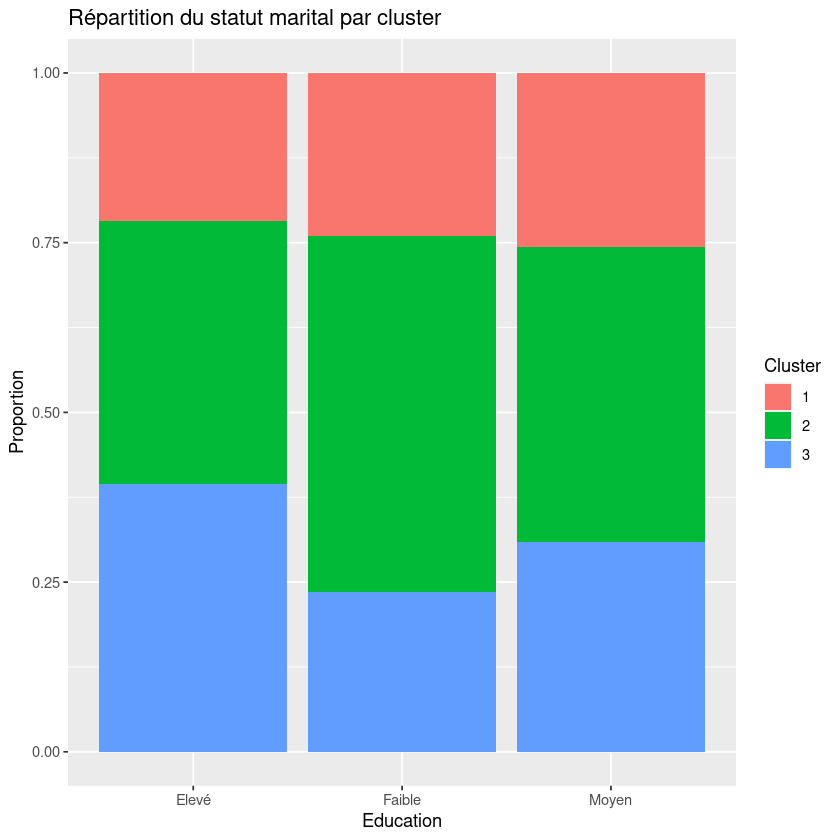

In [72]:
ggplot(data_with_clusters, aes(x = Education, fill = Cluster)) +
  geom_bar(position = "fill") +
  labs(title = "Répartition du statut marital par cluster", x = "Education", y = "Proportion")

Bon le gros du gros c'est que les personnes qui dépensent le plus sont celle qui n'ont pas d'enfant, soit jeune soit trés vieux, peu importe l'éducation mais globalement plutot seul. C'est ce que on avait vu dans les autres types de clusters mais la c'ets le plus évident, ce suit les dimensions de l'ACP. Les résultats sont cohérents avec ceux de l'ACM.


idée : les gens qui dépensent le plus sont ceux sans enfants => pas utilse de faire un rayon enfant. Développer les rayon vin et viande, qui coutent plus cher mais qui interressent les gens qui ont de l'argent et pas d'enfants.